In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

This is a survey data where people were asked different questions and were asked to rate them as "Nerdy" on the scale of 0-7.

In [2]:
train_data = pd.read_csv('../input/iitgaih12021-22/train.csv')
test_data = pd.read_csv('../input/iitgaih12021-22/test.csv')

In [3]:
train_data

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,major,race_arab,race_asian,race_black,race_white,race_hispanic,race_nativeam,race_nativeau,race_other,nerdy
0,811406,4,5,5,4,5,4,5,3,4,...,NaN,0,0,0,1,0,0,0,0,6
1,248038,4,3,3,2,5,3,3,5,4,...,NaN,0,1,0,0,0,0,0,0,4
2,847531,5,5,5,5,5,5,5,5,4,...,Buisiness Studies,Art,Geography,Biology,G,0,0,0,1,0
3,708422,1,1,3,1,4,4,5,1,3,...,economics,0,0,0,1,0,0,0,0,4
4,269597,5,1,2,5,4,2,4,4,3,...,Currently attending programming,0,0,0,1,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15130,196094,4,4,3,3,5,2,4,4,5,...,design,0,0,0,0,1,0,0,0,4
15131,17413,5,5,5,4,5,4,5,4,4,...,Game Design and Development,0,0,0,1,0,0,0,0,7
15132,398852,4,0,2,1,5,2,5,1,4,...,medicine,0,0,0,1,0,0,0,0,5
15133,479759,4,4,5,3,5,5,5,2,5,...,Anthropology,0,0,0,1,0,0,0,0,6


In [4]:
test_data.columns

Index(['id', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'country', 'introelapse',
       'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2',
       'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'screenw', 'screenh', 'hand',
       'religion', 'orientation', 'voted', 'married', 'familysize', 'major',
       'race_arab', 'race_asian', 'race_black', 'race_white', 'race_hispanic',
       'race_nativeam', 'race_nativeau', 'race_other'],
      dtype='object')

In [5]:
train_data.columns

Index(['id', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'country', 'introelapse',
       'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2',
       'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'screenw', 'screenh', 'hand',
       'religion', 'orientation', 'voted', 'married', 'familysize', 'major',
       'race_arab', 'race_asian', 'race_black', 'race_white', 'race_hispanic',
       'race_nativeam', 'race_nativeau', 'race_other', 'nerdy'],
      dtype='object')

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15135 entries, 0 to 15134
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             15135 non-null  int64 
 1   Q1             15135 non-null  int64 
 2   Q2             15135 non-null  int64 
 3   Q3             15135 non-null  int64 
 4   Q4             15135 non-null  int64 
 5   Q5             15135 non-null  int64 
 6   Q6             15135 non-null  int64 
 7   Q7             15135 non-null  int64 
 8   Q8             15135 non-null  int64 
 9   Q9             15135 non-null  int64 
 10  Q10            15135 non-null  int64 
 11  Q11            15135 non-null  int64 
 12  Q12            15135 non-null  int64 
 13  Q13            15135 non-null  int64 
 14  Q14            15135 non-null  int64 
 15  Q15            15135 non-null  int64 
 16  Q16            15135 non-null  int64 
 17  Q17            15135 non-null  int64 
 18  Q18            15135 non-n

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10091 entries, 0 to 10090
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             10091 non-null  int64 
 1   Q1             10091 non-null  int64 
 2   Q2             10091 non-null  int64 
 3   Q3             10091 non-null  int64 
 4   Q4             10091 non-null  int64 
 5   Q5             10091 non-null  int64 
 6   Q6             10091 non-null  int64 
 7   Q7             10091 non-null  int64 
 8   Q8             10091 non-null  int64 
 9   Q9             10091 non-null  int64 
 10  Q10            10091 non-null  int64 
 11  Q11            10091 non-null  int64 
 12  Q12            10091 non-null  int64 
 13  Q13            10091 non-null  int64 
 14  Q14            10091 non-null  int64 
 15  Q15            10091 non-null  int64 
 16  Q16            10091 non-null  int64 
 17  Q17            10091 non-null  int64 
 18  Q18            10091 non-n

In [8]:
train_data['nerdy'].value_counts()

6    4460
7    3896
5    3513
4    1802
3     504
2     386
1     304
0     270
Name: nerdy, dtype: int64

### Q1- Q26 columns (Que Score)

If some person has high values for each of each of questions from q1 to q26, then there is a high change he is nerdy. so we can make a feature which sums values in each of column and divides it by 130 (= 26 * 5), coz its the maximum score that we can get.

In [9]:
test = test_data.copy()
train = train_data.copy()

In [10]:
cols =  ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26']
    
train['que_score'] = train[cols].sum(axis=1) / 130

In [11]:
test['que_score'] = test[cols].sum(axis=1) / 130

In [12]:
train.head()

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,race_arab,race_asian,race_black,race_white,race_hispanic,race_nativeam,race_nativeau,race_other,nerdy,que_score
0,811406,4,5,5,4,5,4,5,3,4,...,0,0,0,1,0,0,0,0,6,0.823077
1,248038,4,3,3,2,5,3,3,5,4,...,0,1,0,0,0,0,0,0,4,0.638462
2,847531,5,5,5,5,5,5,5,5,4,...,Art,Geography,Biology,G,0,0,0,1,0,0.838462
3,708422,1,1,3,1,4,4,5,1,3,...,0,0,0,1,0,0,0,0,4,0.623077
4,269597,5,1,2,5,4,2,4,4,3,...,0,0,0,1,0,0,0,0,5,0.592308


In [13]:
test.head()

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,major,race_arab,race_asian,race_black,race_white,race_hispanic,race_nativeam,race_nativeau,race_other,que_score
0,869598,3,5,4,3,5,5,5,4,4,...,mechatronics engineering,0,0,0,1,1,0,0,0,0.861538
1,682098,4,5,5,4,5,3,5,4,4,...,Education,0,0,0,1,0,0,0,0,0.715385
2,278454,3,2,5,2,3,3,2,5,4,...,NaN,0,0,0,1,0,0,0,0,0.615385
3,119007,0,5,5,4,3,5,5,1,5,...,chemical engineering,0,0,0,1,0,0,0,0,0.653846
4,49950,5,5,5,4,5,4,5,5,5,...,computer science,0,0,0,1,0,0,0,1,0.815385


<AxesSubplot:xlabel='nerdy', ylabel='que_score'>

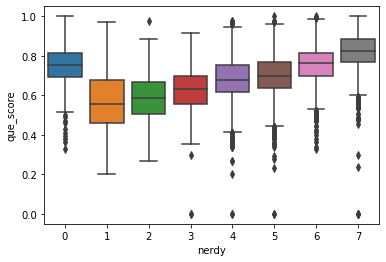

In [14]:
sns.boxplot(y = train['que_score'], x= train['nerdy'])

### Filling Null Values

In [15]:
for col in train_data.columns:
    if train_data[col].isnull().values.any() == True:
        print(str(col))

country
major
race_asian


In [16]:
for col in test.columns:
    if test[col].isnull().values.any() == True:
        print(str(col))

country
major


In [17]:
train['country'].unique()

array(['US', 'CA', 'CH', 'NL', 'AU', 'IL', 'IN', 'GB', 'SG', 'FI', 'SA',
       'BE', 'DE', 'CZ', 'ID', 'NO', 'TH', 'PK', 'SE', 'VE', 'ZW', 'AT',
       'PL', 'PH', 'TT', 'IT', 'EE', 'BG', 'ES', 'MY', 'NONE', 'IE', 'GR',
       'GU', 'BR', 'MX', 'RU', 'AR', 'FR', 'HU', 'TR', 'PT', 'AM', 'RS',
       'KR', 'TW', 'MO', 'PE', 'VN', 'CL', 'RO', 'CR', 'DK', 'HK', 'ZA',
       'PR', 'NG', 'LV', 'LB', 'AE', 'KE', 'NZ', 'TZ', 'JO', 'SK', 'LT',
       'KW', 'SI', 'MA', 'IR', 'OM', 'UA', 'JP', 'PG', 'DZ', 'HR', 'GE',
       'IS', 'BW', 'GY', 'CO', 'EG', 'UY', 'PY', 'NP', 'GT', 'AL', 'BD',
       'CN', 'MT', 'BA', 'BN', 'BY', 'BS', 'BO', 'MK', 'GL', 'SZ', 'BB',
       'BZ', 'SY', 'LU', 'QA', 'DO', 'AZ', 'MG', 'HN', 'GH', 'ET', 'BH',
       'MW', 'CY', 'IM', 'TN', 'JM', 'LK', 'AF', 'VG', 'JE', 'AG', 'GD',
       'HT', 'ZM', 'RE', 'EC', 'MD', 'MU', 'SD', 'SV', 'FJ', 'MZ', nan,
       'MV', 'FM', 'BF', 'RW', 'IQ', 'SL', 'CW', 'AX'], dtype=object)

In [18]:
train['country'].isnull().value_counts()

False    15133
True         2
Name: country, dtype: int64

In [19]:
test['country'].isnull().value_counts()

False    10090
True         1
Name: country, dtype: int64

In [20]:
train[train['country'].isnull() == True]

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,race_arab,race_asian,race_black,race_white,race_hispanic,race_nativeam,race_nativeau,race_other,nerdy,que_score
10145,125873,5,3,5,5,5,3,1,5,1,...,0,0,0,1,0,0,0,0,5,0.692308
10743,593031,4,5,5,5,4,4,4,3,4,...,0,0,1,0,0,0,0,0,5,0.746154


the null values in country column can be filled with "None".

In [21]:
train['country'].fillna('NONE', inplace=True)
train['country'].isnull().value_counts()

False    15135
Name: country, dtype: int64

In [22]:
train['country'].unique()

array(['US', 'CA', 'CH', 'NL', 'AU', 'IL', 'IN', 'GB', 'SG', 'FI', 'SA',
       'BE', 'DE', 'CZ', 'ID', 'NO', 'TH', 'PK', 'SE', 'VE', 'ZW', 'AT',
       'PL', 'PH', 'TT', 'IT', 'EE', 'BG', 'ES', 'MY', 'NONE', 'IE', 'GR',
       'GU', 'BR', 'MX', 'RU', 'AR', 'FR', 'HU', 'TR', 'PT', 'AM', 'RS',
       'KR', 'TW', 'MO', 'PE', 'VN', 'CL', 'RO', 'CR', 'DK', 'HK', 'ZA',
       'PR', 'NG', 'LV', 'LB', 'AE', 'KE', 'NZ', 'TZ', 'JO', 'SK', 'LT',
       'KW', 'SI', 'MA', 'IR', 'OM', 'UA', 'JP', 'PG', 'DZ', 'HR', 'GE',
       'IS', 'BW', 'GY', 'CO', 'EG', 'UY', 'PY', 'NP', 'GT', 'AL', 'BD',
       'CN', 'MT', 'BA', 'BN', 'BY', 'BS', 'BO', 'MK', 'GL', 'SZ', 'BB',
       'BZ', 'SY', 'LU', 'QA', 'DO', 'AZ', 'MG', 'HN', 'GH', 'ET', 'BH',
       'MW', 'CY', 'IM', 'TN', 'JM', 'LK', 'AF', 'VG', 'JE', 'AG', 'GD',
       'HT', 'ZM', 'RE', 'EC', 'MD', 'MU', 'SD', 'SV', 'FJ', 'MZ', 'MV',
       'FM', 'BF', 'RW', 'IQ', 'SL', 'CW', 'AX'], dtype=object)

In [23]:
test[test['country'].isnull() == True]

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,major,race_arab,race_asian,race_black,race_white,race_hispanic,race_nativeam,race_nativeau,race_other,que_score
8112,889125,3,5,4,3,5,3,5,5,5,...,None,0,0,0,1,0,0,0,0,0.869231


In [24]:
test['country'].unique()

array(['BR', 'DE', 'US', 'GB', 'GR', 'CA', 'AU', 'FI', 'NO', 'ID', 'PL',
       'DK', 'NL', 'JP', 'IL', 'SG', 'CO', 'KE', 'NONE', 'FR', 'PT', 'CH',
       'IN', 'TH', 'MX', 'RO', 'SE', 'MY', 'AT', 'IE', 'LU', 'PK', 'AR',
       'RS', 'PH', 'ES', 'TR', 'IT', 'TT', 'DO', 'AE', 'NZ', 'HN', 'ZA',
       'BG', 'RU', 'KR', 'HU', 'DZ', 'BE', 'LT', 'HR', 'SK', 'SA', 'VN',
       'EC', 'BS', 'CR', 'UA', 'MU', 'HK', 'SI', 'GE', 'CL', 'VE', 'CZ',
       'MN', 'VU', 'NP', 'IR', 'PR', 'BY', 'BA', 'ME', 'PA', 'IS', 'KW',
       'NG', 'BN', 'UY', 'VI', 'LY', 'MK', 'RE', 'ZM', 'IM', 'LV', 'CN',
       'PY', 'TW', 'JO', 'PE', 'EG', 'BD', 'QA', 'EE', 'MA', 'LB', 'KZ',
       'SZ', 'AL', 'JM', 'GT', 'PS', 'TN', 'CY', 'SS', 'BW', 'GH', 'KH',
       'GU', 'MP', 'SD', 'BB', 'AZ', 'FO', 'NI', 'MT', 'CW', 'GY', 'FJ',
       'LA', 'BH', 'MZ', 'IQ', 'UG', 'MD', 'LK', 'KY', nan, 'AO', 'SV',
       'SY', 'LC', 'GF', 'MC'], dtype=object)

In [25]:
test['country'].fillna('NONE', inplace=True)
test['country'].isnull().value_counts()

False    10091
Name: country, dtype: int64

In [26]:
train['race_asian'].isnull().value_counts()

False    15133
True         2
Name: race_asian, dtype: int64

In [27]:
train[train['race_asian'].isnull() == True]

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,race_arab,race_asian,race_black,race_white,race_hispanic,race_nativeam,race_nativeau,race_other,nerdy,que_score
9278,28077,3,5,5,5,2,3,5,3,3,...,&#26800,NaN,0,1,0,0,0,0,0,0.761538
10367,313483,4,5,4,3,5,5,5,5,4,...,English Literature,NaN,0,0,0,1,0,0,0,0.900000


we can fill race_asain null values with 0 as the person has filled 1 in other races

In [28]:
train['race_asian'].fillna(0, inplace=True)
train['race_asian'].isnull().value_counts()

False    15135
Name: race_asian, dtype: int64

In [29]:
train['major'].isnull().value_counts()

False    8476
True     6659
Name: major, dtype: int64

In [30]:
test['major'].isnull().value_counts()

False    5703
True     4388
Name: major, dtype: int64

In [31]:
train['race_white'].replace('0',0,inplace=True)
train['race_white'].replace('1',1,inplace=True)

In [32]:
train['race_white'].value_counts()

1     11267
0      3867
 G        1
Name: race_white, dtype: int64

In [33]:
train['race_white'].unique()

array([1, 0, ' G'], dtype=object)

In [34]:
train[train['major'].isnull().values == True]['race_white'].unique()

array([1, 0], dtype=object)

Many people have filled their majors in race column instead of major column. So if race_arab,asain,black and white does not contain any major subjects, then we can fill the train major with none.

In [35]:
train[train['major'].isnull()]['race_white'].unique()

array([1, 0], dtype=object)

In [36]:
train['major'].fillna('NONE', inplace=True)
train['major'].isnull().value_counts()

False    15135
Name: major, dtype: int64

In [37]:
test['major'].fillna('NONE', inplace=True)
test['major'].isnull().value_counts()

False    10091
Name: major, dtype: int64

In [38]:
train.isnull().values.any() #successfully removed all null values

False

In [39]:
test.isnull().values.any() #successfully removed all null values

False

### Treating object race columns

As we can see arab,asian,black and white columns are object columns, instead they should have been int. This is becuase many people have filled their major subjects in this columns. So we have to add this entries to the major list and replace this values with either 0 or 1 appropriatly

Firstly replacing all string 0's and 1's into int

In [40]:
train['race_arab'].replace('0',0,inplace=True)
train['race_arab'].replace('1',1,inplace=True)
train['race_asian'].replace('0',0,inplace=True)
train['race_asian'].replace('1',1,inplace=True)
train['race_black'].replace('0',0,inplace=True)
train['race_black'].replace('1',1,inplace=True)
train['race_white'].replace('0',0,inplace=True)
train['race_white'].replace('1',1,inplace=True)

In [41]:
test['race_arab'].replace('0',0,inplace=True)
test['race_arab'].replace('1',1,inplace=True)
test['race_asian'].replace('0',0,inplace=True)
test['race_asian'].replace('1',1,inplace=True)
test['race_black'].replace('0',0,inplace=True)
test['race_black'].replace('1',1,inplace=True)

In [42]:
train['race_arab'].unique()

array([0, ' Art', 1, ' philosophy', ' statistics grad', ' civil',
       ' Mathematics', ' Psychology', ' Anthropology', ' Comp Sci',
       ' game development', ' spanish literature',
       ' Human Resource Development', ' probably going the Engl',
       ' psychology', ' applied linguistics',
       ' reconstructive and aesthetic surgeon', ' Political Science',
       ' computer science', ' History', ' poli sci', ' non worked out',
       ' economics', ' peace and development ', 'college', ' Law',
       ' Pure Mathematics (undert', ' anthropology', ' Computer Science',
       ' MEd. Adult eLearning', ' German', ' kinesiology', ' botany',
       ' Chemistry', ' Studio Arts', ' Cognitive Sci', ' biology',
       ' Russian Language', ' russian language',
       ' social and behavioral sciences', ' Business',
       ' criminal justice', ' english', ' Communications', ' sociology',
       ' Finance', ' Entrepreneurship', ' then communication and cinema',
       ' Spanish', ' programming

In [43]:
train['race_asian'].unique()

array([0, 1, ' Geography', ' sociology)', ' Fine Arts (Studio - pa',
       ' bachelors in ', ' publ', 'graphic design', ' Socialogy', ' art',
       ' statistics', ' astrophysics', ' english', ' French',
       ' Psychology', ' JD', ' Ind', ' Business', ' Theology', ' french',
       ' Library and Informati', ' Linguistics', ' ', 'Art',
       ' computer science', ' educational', ' integrated ma', ' Biology',
       ' and Spanish', ' Counseling Psyc', 'Electronics', ' English',
       ' mathematics ', ' psychology', ' Ps',
       ' Physical Education and Health', ' school p',
       ' and Economics (PPE)', ' Music', ' or psychology', ' mathematics',
       ' and writi', ' lite', ' Foreign Language Educati',
       ' technology and  things rel', ' and Technology',
       ' Elementary Educatio', ' communi', ' Engineering', ' law',
       ' sociology ', ' comp sci', ' Busines', ' chemestry ',
       ' cultural studies', ' Philosophy', ' englisj'], dtype=object)

In [44]:
train['race_black'].unique()

array([0, ' Biology', 1, ' Photography A-lev', ' computer scien',
       ' german)', ' Psychology', ' music', ' Informatio', ' Chemistry.',
       ' econo'], dtype=object)

In [45]:
train['race_white'].unique()

array([1, 0, ' G'], dtype=object)

In [46]:
train[(train['major'] != 'NONE') & (train['race_arab'] != 0) & (train['race_arab'] != 1)]['nerdy'].unique()

array([0, 1])

In [47]:
train[((train['race_arab'] != 0) & (train['race_arab'] != 1)) | \
     ((train['race_asian'] != 0) & (train['race_asian'] != 1)) | \
     ((train['race_black'] != 0) & (train['race_black'] != 1)) | \
     ((train['race_white'] != 0) & (train['race_white'] != 1))]['nerdy'].unique()

array([0, 1])

In [48]:
train[((train['race_arab'] != 0) & (train['race_arab'] != 1)) | \
     ((train['race_asian'] != 0) & (train['race_asian'] != 1)) | \
     ((train['race_black'] != 0) & (train['race_black'] != 1)) | \
     ((train['race_white'] != 0) & (train['race_white'] != 1))]

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,race_arab,race_asian,race_black,race_white,race_hispanic,race_nativeam,race_nativeau,race_other,nerdy,que_score
2,847531,5,5,5,5,5,5,5,5,4,...,Art,Geography,Biology,G,0,0,0,1,0,0.838462
110,274459,4,4,3,5,3,2,3,4,2,...,philosophy,sociology),0,0,0,1,0,1,0,0.561538
119,56888,2,4,4,1,2,5,4,2,2,...,statistics grad,0,0,0,1,0,0,0,0,0.538462
341,619493,2,5,5,4,5,5,5,5,4,...,civil,0,1,0,0,0,0,0,0,0.861538
394,140704,4,4,4,3,4,3,5,4,5,...,Mathematics,0,0,0,1,0,0,0,0,0.746154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14992,909522,3,5,3,2,4,3,5,5,5,...,Engineering,0,0,0,1,0,1,0,0,0.776923
15022,983320,1,1,2,1,2,2,3,3,1,...,biology,0,0,0,1,0,0,0,1,0.369231
15025,940240,4,4,3,4,4,4,5,2,5,...,Chemistry,0,0,0,1,0,0,0,0,0.669231
15067,320876,5,1,4,2,1,3,3,1,2,...,English,0,0,0,1,0,0,0,0,0.430769


In [49]:
train[((train['race_arab'] == 0) | (train['race_arab'] == 1))]['race_black'].unique()

array([0, 1], dtype=object)

In [50]:
test[((test['race_arab'] == 0) | (test['race_arab'] == 1))]['race_asian'].unique()

array([0, 1], dtype=object)

In [51]:
test[((test['race_arab'] != 0) & (test['race_arab'] != 1)) | \
     ((test['race_asian'] != 0) & (test['race_asian'] != 1)) | \
     ((test['race_black'] != 0) & (test['race_black'] != 1)) | \
     ((test['race_white'] != 0) & (test['race_white'] != 1))]

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,major,race_arab,race_asian,race_black,race_white,race_hispanic,race_nativeam,race_nativeau,race_other,que_score
65,82919,2,5,4,1,1,4,5,2,3,...,Speech,language and hearing sciences,0,0,0,0,1,0,0,0.584615
108,955193,4,4,4,4,5,3,5,3,3,...,Biochemistry,Chemical Engineering,0,0,0,1,0,0,0,0.646154
110,986091,3,5,4,3,5,4,5,5,5,...,Anthropology,Biology,Public Health,0,0,0,1,0,0,0.846154
114,969492,4,5,5,3,5,4,5,1,5,...,Aerospace engineering,physics,0,0,0,1,0,0,0,0.815385
161,211411,1,1,2,1,4,5,2,1,4,...,Music,English,0,0,0,1,0,0,0,0.507692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9865,935015,4,3,4,3,4,5,4,2,4,...,History,Chinese,0,0,0,1,0,0,0,0.700000
9870,117176,2,2,3,4,5,5,5,2,3,...,music,theology,0,0,0,1,0,0,0,0.692308
9882,907319,3,5,5,5,5,3,5,1,5,...,english,geography,history,0,0,0,1,0,0,0.807692
10034,700097,2,3,2,4,2,5,1,4,3,...,English,Theatre,0,0,0,1,0,0,0,0.669231


In [52]:
test[((test['race_arab'] != 0) & (test['race_arab'] != 1))]

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,major,race_arab,race_asian,race_black,race_white,race_hispanic,race_nativeam,race_nativeau,race_other,que_score
65,82919,2,5,4,1,1,4,5,2,3,...,Speech,language and hearing sciences,0,0,0,0,1,0,0,0.584615
108,955193,4,4,4,4,5,3,5,3,3,...,Biochemistry,Chemical Engineering,0,0,0,1,0,0,0,0.646154
110,986091,3,5,4,3,5,4,5,5,5,...,Anthropology,Biology,Public Health,0,0,0,1,0,0,0.846154
114,969492,4,5,5,3,5,4,5,1,5,...,Aerospace engineering,physics,0,0,0,1,0,0,0,0.815385
161,211411,1,1,2,1,4,5,2,1,4,...,Music,English,0,0,0,1,0,0,0,0.507692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9865,935015,4,3,4,3,4,5,4,2,4,...,History,Chinese,0,0,0,1,0,0,0,0.700000
9870,117176,2,2,3,4,5,5,5,2,3,...,music,theology,0,0,0,1,0,0,0,0.692308
9882,907319,3,5,5,5,5,3,5,1,5,...,english,geography,history,0,0,0,1,0,0,0.807692
10034,700097,2,3,2,4,2,5,1,4,3,...,English,Theatre,0,0,0,1,0,0,0,0.669231


In [53]:
train[(train['race_arab'] != 0) & (train['race_arab'] != 1)]

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,race_arab,race_asian,race_black,race_white,race_hispanic,race_nativeam,race_nativeau,race_other,nerdy,que_score
2,847531,5,5,5,5,5,5,5,5,4,...,Art,Geography,Biology,G,0,0,0,1,0,0.838462
110,274459,4,4,3,5,3,2,3,4,2,...,philosophy,sociology),0,0,0,1,0,1,0,0.561538
119,56888,2,4,4,1,2,5,4,2,2,...,statistics grad,0,0,0,1,0,0,0,0,0.538462
341,619493,2,5,5,4,5,5,5,5,4,...,civil,0,1,0,0,0,0,0,0,0.861538
394,140704,4,4,4,3,4,3,5,4,5,...,Mathematics,0,0,0,1,0,0,0,0,0.746154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14992,909522,3,5,3,2,4,3,5,5,5,...,Engineering,0,0,0,1,0,1,0,0,0.776923
15022,983320,1,1,2,1,2,2,3,3,1,...,biology,0,0,0,1,0,0,0,1,0.369231
15025,940240,4,4,3,4,4,4,5,2,5,...,Chemistry,0,0,0,1,0,0,0,0,0.669231
15067,320876,5,1,4,2,1,3,3,1,2,...,English,0,0,0,1,0,0,0,0,0.430769


If we observe each of the column properly, whoever people who have put any value except 0 or 1 in any race column, their nerdiness rating is either 0 or 1. This detail can be very useful. We can make a new column, "wrong_race" and fill it with 1 for people who have entered incorrect value of race (i.e, anything except 0 or 1). Also, only those rows in which race_arab is wrong, have other races also wrong, i.e., if some rows has value of race_arab to be 0 or 1, then the rest races are also either 0 or 1

### Wrong Race Feature

In [54]:
train['wrong_race'] = 0
wrong_race_idx = []
for x in range(train.shape[0]):
    if ((train.loc[x, 'race_arab'] != 0) & (train.loc[x, 'race_arab'] != 1)):
        wrong_race_idx.append(x)
        
for x in wrong_race_idx:
    train.loc[x, 'wrong_race'] = 1

In [55]:
test['wrong_race'] = 0
wrong_race_idx_test = []
for x in range(test.shape[0]):
    if ((test.loc[x, 'race_arab'] != 0) & (test.loc[x, 'race_arab'] != 1)):
        wrong_race_idx_test.append(x)
        
for x in wrong_race_idx_test:
    test.loc[x, 'wrong_race'] = 1

In [56]:
test[test['wrong_race'] == 1]

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,race_arab,race_asian,race_black,race_white,race_hispanic,race_nativeam,race_nativeau,race_other,que_score,wrong_race
65,82919,2,5,4,1,1,4,5,2,3,...,language and hearing sciences,0,0,0,0,1,0,0,0.584615,1
108,955193,4,4,4,4,5,3,5,3,3,...,Chemical Engineering,0,0,0,1,0,0,0,0.646154,1
110,986091,3,5,4,3,5,4,5,5,5,...,Biology,Public Health,0,0,0,1,0,0,0.846154,1
114,969492,4,5,5,3,5,4,5,1,5,...,physics,0,0,0,1,0,0,0,0.815385,1
161,211411,1,1,2,1,4,5,2,1,4,...,English,0,0,0,1,0,0,0,0.507692,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9865,935015,4,3,4,3,4,5,4,2,4,...,Chinese,0,0,0,1,0,0,0,0.700000,1
9870,117176,2,2,3,4,5,5,5,2,3,...,theology,0,0,0,1,0,0,0,0.692308,1
9882,907319,3,5,5,5,5,3,5,1,5,...,geography,history,0,0,0,1,0,0,0.807692,1
10034,700097,2,3,2,4,2,5,1,4,3,...,Theatre,0,0,0,1,0,0,0,0.669231,1


In [57]:
train['race_white'].unique()

array([1, 0, ' G'], dtype=object)

race_white column in train contains a value G. Replacing it with 0

In [58]:
train['race_white'].replace(' G', 0, inplace=True)

In [59]:
train['race_white'].unique()

array([1, 0])

In [60]:
train['race_arab'].value_counts()

0                        14631
1                          286
 English                     9
 psychology                  5
 Spanish                     5
                         ...  
 linguistics                 1
 MBA                         1
 political science           1
 other than that it w        1
 Design                      1
Name: race_arab, Length: 160, dtype: int64

In [61]:
test['race_arab'].value_counts()

0                         9720
1                          218
 English                     6
 Mathematics                 4
 english                     4
                          ... 
 clinical mental healt       1
 Technology                  1
 chemistry                   1
 religion                    1
 geography                   1
Name: race_arab, Length: 119, dtype: int64

In [62]:
train['race_asian'].value_counts()

0                                 12767
1                                  2309
 Business                             2
 Geography                            2
 art                                  2
 Engineering                          2
 psychology                           1
 Ps                                   1
 Physical Education and Health        1
 school p                             1
 and Economics (PPE)                  1
 Music                                1
 or psychology                        1
 mathematics                          1
 and writi                            1
 lite                                 1
 technology and  things rel           1
 Foreign Language Educati             1
 English                              1
 and Technology                       1
 Elementary Educatio                  1
 communi                              1
 law                                  1
 sociology                            1
 comp sci                             1


In [63]:
test['race_asian'].value_counts()

0                        8517
1                        1534
 Computer Science           2
 history                    1
 Philosophy                 1
 English                    1
 Social Justice             1
 MA Human Factors           1
 anthropology               1
 physical ed                1
 2 BS)                      1
 also                       1
 Acting                     1
 Com                        1
 Abnormal Psycholog         1
 and Defense                1
 Interior Design            1
 architcture                1
 digital media              1
 sociology minor            1
 Criminal Justice           1
 german                     1
 Chemisty                   1
 & forensic science         1
 Public Health              1
 Nursing                    1
 and Society                1
 & Natural Resources        1
 Law                        1
 Molecular Biology (        1
 Computational Lingui       1
 Physics                    1
 computer science           1
 and Globa

In [64]:
train['race_black'].value_counts()

0                     14397
1                       729
 Biology                  1
 Photography A-lev        1
 computer scien           1
 german)                  1
 Psychology               1
 music                    1
 Informatio               1
 Chemistry.               1
 econo                    1
Name: race_black, dtype: int64

In [65]:
test['race_black'].value_counts()

0                9603
1                 485
 Electrical E       1
 have "agn          1
 Theat              1
Name: race_black, dtype: int64

As we can see, majority values in race arab, asian and black are 0. replacing the incorrect values with 0 in there columns

In [66]:
for x in range(train.shape[0]):
    if ((train.loc[x, 'race_arab'] != 0) & (train.loc[x, 'race_arab'] != 1)):
        train.loc[x, 'race_arab'] = 0

In [67]:
for x in range(train.shape[0]):
    if ((train.loc[x, 'race_asian'] != 0) & (train.loc[x, 'race_asian'] != 1)):
        train.loc[x, 'race_asian'] = 0
        
        
for x in range(train.shape[0]):
    if ((train.loc[x, 'race_black'] != 0) & (train.loc[x, 'race_black'] != 1)):
        train.loc[x, 'race_black'] = 0

In [68]:
train['race_asian'].unique()

array([0, 1], dtype=object)

In [69]:
for x in range(test.shape[0]):
    if ((test.loc[x, 'race_arab'] != 0) & (test.loc[x, 'race_arab'] != 1)):
        test.loc[x, 'race_arab'] = 0
        
for x in range(test.shape[0]):
    if ((test.loc[x, 'race_asian'] != 0) & (test.loc[x, 'race_asian'] != 1)):
        test.loc[x, 'race_asian'] = 0
        
        
for x in range(test.shape[0]):
    if ((test.loc[x, 'race_black'] != 0) & (test.loc[x, 'race_black'] != 1)):
        test.loc[x, 'race_black'] = 0

In [70]:
test['race_asian'].unique()

array([0, 1], dtype=object)

In [71]:
cols = ['race_arab', 'race_asian', 'race_black']

for col in cols:
    train[[col]] = train[[col]].apply(pd.to_numeric)

In [72]:
train['race_arab'].unique()

array([0, 1])

In [73]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10091 entries, 0 to 10090
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10091 non-null  int64  
 1   Q1             10091 non-null  int64  
 2   Q2             10091 non-null  int64  
 3   Q3             10091 non-null  int64  
 4   Q4             10091 non-null  int64  
 5   Q5             10091 non-null  int64  
 6   Q6             10091 non-null  int64  
 7   Q7             10091 non-null  int64  
 8   Q8             10091 non-null  int64  
 9   Q9             10091 non-null  int64  
 10  Q10            10091 non-null  int64  
 11  Q11            10091 non-null  int64  
 12  Q12            10091 non-null  int64  
 13  Q13            10091 non-null  int64  
 14  Q14            10091 non-null  int64  
 15  Q15            10091 non-null  int64  
 16  Q16            10091 non-null  int64  
 17  Q17            10091 non-null  int64  
 18  Q18   

In [74]:
cols = ['race_arab', 'race_asian', 'race_black']

for col in cols:
    test[[col]] = test[[col]].apply(pd.to_numeric)

### Checking the TIPI columns

In [75]:
tipi_cols = ['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10']

for col in tipi_cols:
    print(str(col) + " " , train[col].unique())

TIPI1  [1 5 2 3 6 4 7 0]
TIPI2  [5 4 6 3 7 1 2 0]
TIPI3  [5 3 6 7 4 2 0 1]
TIPI4  [1 7 5 3 2 6 4 0]
TIPI5  [4 7 5 6 3 0 1 2]
TIPI6  [7 5 6 3 1 2 0 4]
TIPI7  [2 6 1 4 5 7 3 0]
TIPI8  [7 6 1 4 2 5 3 0]
TIPI9  [4 3 7 1 5 6 0 2]
TIPI10  [7 1 6 2 4 3 5 0]


In [76]:
train['TIPI1'].value_counts()

2    3488
1    3088
3    2260
5    2141
6    1944
7    1094
4    1066
0      54
Name: TIPI1, dtype: int64

Lets make a column defined as TIPI score. Which sums all values of TIPI score

In [77]:
tipi_cols = ['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10']

train['tipi_score'] = train[tipi_cols].sum(axis = 1)

In [78]:
test['tipi_score'] = test[tipi_cols].sum(axis=1)

In [79]:
train.head()

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,race_black,race_white,race_hispanic,race_nativeam,race_nativeau,race_other,nerdy,que_score,wrong_race,tipi_score
0,811406,4,5,5,4,5,4,5,3,4,...,0,1,0,0,0,0,6,0.823077,0,43
1,248038,4,3,3,2,5,3,3,5,4,...,0,0,0,0,0,0,4,0.638462,0,47
2,847531,5,5,5,5,5,5,5,5,4,...,0,0,0,0,0,1,0,0.838462,1,51
3,708422,1,1,3,1,4,4,5,1,3,...,0,1,0,0,0,0,4,0.623077,0,44
4,269597,5,1,2,5,4,2,4,4,3,...,0,1,0,0,0,0,5,0.592308,0,43


<AxesSubplot:xlabel='nerdy', ylabel='tipi_score'>

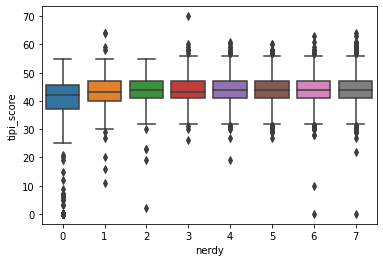

In [80]:
sns.boxplot( y = train['tipi_score'], x = train['nerdy'])

This feature is also not of much help

### Checking some more columns

In [81]:
vcl_col = ['VCL1', 'VCL2',
       'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16']

for col in vcl_col:
    print(str(col) + " " , train[col].unique())

VCL1  [1 0]
VCL2  [1 0]
VCL3  [0 1]
VCL4  [1 0]
VCL5  [1 0]
VCL6  [0 1]
VCL7  [0 1]
VCL8  [0 1]
VCL9  [0 1]
VCL10  [1 0]
VCL11  [0 1]
VCL12  [0 1]
VCL13  [1 0]
VCL14  [1 0]
VCL15  [1 0]
VCL16  [1 0]


In [82]:
train['education'].unique()

array([1, 2, 4, 3, 0])

In [83]:
test['education'].unique()

array([0, 3, 1, 4, 2])

In [84]:
train['urban'].unique()

array([2, 3, 1, 0])

In [85]:
train['gender'].unique()

array([1, 2, 3, 0])

In [86]:
train['engnat'].unique()

array([1, 2, 0])

In [87]:
train['age'].unique()

array([   16,    19,    24,    56,    18,    48,    17,    28,    21,
          15,    32,    50,    27,    14,    20,    46,    22,    26,
          30,    44,    42,    39,    41,    52,    35,    33,    40,
          25,    37,    47,    45,    23,    54,    29,    13,    34,
          43,    31,    72,    51,    62,    66,    38,    63,    49,
          53,    36,    65,    69,    74,    64,    55,    60,    67,
          59,    58,    57,    61,    79,    83,    68,    77,    90,
          71,    70,    81,    73, 38822,  1997,    75,    82,   722,
         545,    76,    78,    99,   123,   374,  1999,   809,   116])

In [88]:
train['hand'].value_counts()

1    12932
2     1528
3      630
0       45
Name: hand, dtype: int64

In [89]:
test['hand'].value_counts()

1    8574
2    1043
3     435
0      39
Name: hand, dtype: int64

In [90]:
train['religion'].value_counts()

2     4422
1     3677
4     1628
6     1337
12    1294
7     1227
10     491
8      267
3      218
0      213
9      198
5      141
11      22
Name: religion, dtype: int64

### Age column

In [91]:
train['age'].unique()

array([   16,    19,    24,    56,    18,    48,    17,    28,    21,
          15,    32,    50,    27,    14,    20,    46,    22,    26,
          30,    44,    42,    39,    41,    52,    35,    33,    40,
          25,    37,    47,    45,    23,    54,    29,    13,    34,
          43,    31,    72,    51,    62,    66,    38,    63,    49,
          53,    36,    65,    69,    74,    64,    55,    60,    67,
          59,    58,    57,    61,    79,    83,    68,    77,    90,
          71,    70,    81,    73, 38822,  1997,    75,    82,   722,
         545,    76,    78,    99,   123,   374,  1999,   809,   116])

In [92]:
test['age'].unique()

array([ 23,  24,  14,  65,  29,  19,  15,  13,  16,  20,  18,  25,  27,
        22,  37,  50,  44,  31,  47,  48,  35,  30,  46,  41,  21,  17,
        40,  28,  32,  34,  64,  52,  54,  56,  33,  36,  51,  26,  60,
        42,  63,  67,  43,  38,  61,  49,  39,  72,  68,  57,  66, 155,
        45,  53,  59,  70,  62,  55,  58,  74,  78,  73,  88,  77,  99,
       336, 100,  69,  80,  75])

There are some weird values, like 38822, 1997, 722, 545, 123, 374, 1999, 809, 116

In [93]:
train[(train['age'] == 38822) | (train['age'] == 1997) |(train['age'] == 722)| (train['age'] == 1999) | (train['age'] == 545)| (train['age'] == 374) | (train['age'] == 809)| (train['age'] == 123)| (train['age'] == 116)]

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,race_black,race_white,race_hispanic,race_nativeam,race_nativeau,race_other,nerdy,que_score,wrong_race,tipi_score
6487,296689,5,3,1,5,4,3,3,4,5,...,0,0,0,0,0,0,6,0.600000,0,39
7025,769260,4,4,4,3,3,3,3,5,3,...,0,0,0,0,0,0,4,0.669231,0,41
7723,110573,1,1,3,3,5,3,5,1,5,...,0,1,0,0,0,0,5,0.553846,0,39
10377,200414,4,5,4,3,4,4,4,4,5,...,0,1,0,0,0,0,3,0.746154,0,39
13059,871417,4,4,5,5,5,4,5,5,5,...,0,0,0,0,0,0,5,0.892308,0,52
13429,616042,5,5,5,5,5,5,5,5,5,...,0,0,1,0,0,0,7,0.976923,0,46
13674,467634,5,3,5,4,4,3,5,4,3,...,0,0,0,0,0,0,7,0.807692,0,49
13726,911873,2,2,4,2,3,2,2,5,2,...,0,1,0,0,0,0,4,0.576923,0,46
13934,524508,5,5,5,4,4,3,4,5,4,...,0,1,0,0,0,0,6,0.846154,0,43


In [94]:
test['age'].unique()

array([ 23,  24,  14,  65,  29,  19,  15,  13,  16,  20,  18,  25,  27,
        22,  37,  50,  44,  31,  47,  48,  35,  30,  46,  41,  21,  17,
        40,  28,  32,  34,  64,  52,  54,  56,  33,  36,  51,  26,  60,
        42,  63,  67,  43,  38,  61,  49,  39,  72,  68,  57,  66, 155,
        45,  53,  59,  70,  62,  55,  58,  74,  78,  73,  88,  77,  99,
       336, 100,  69,  80,  75])

1999 and 1997 seem like birth year. We can convert it to their age. Data was collected between 2015 and 2018. So thier age must be between 1) for 1999: 16 - 19 2) for 1997: 18-21

In [95]:
train['age'].value_counts()

18       1370
17       1349
16       1298
19       1091
15        950
         ... 
82          1
1997        1
38822       1
81          1
116         1
Name: age, Length: 81, dtype: int64

Lets substitute both 1999 and 1997 with 18 year of age, as its the most common one

In [96]:
train[train['age'] == 1999]

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,race_black,race_white,race_hispanic,race_nativeam,race_nativeau,race_other,nerdy,que_score,wrong_race,tipi_score
13674,467634,5,3,5,4,4,3,5,4,3,...,0,0,0,0,0,0,7,0.807692,0,49


In [97]:
train.loc[7025, 'age'] = 18

In [98]:
train.loc[13674, 'age'] = 18

In [99]:
train['age'].value_counts()

18     1372
17     1349
16     1298
19     1091
15      950
       ... 
99        1
123       1
374       1
809       1
116       1
Name: age, Length: 79, dtype: int64

<AxesSubplot:xlabel='age', ylabel='nerdy'>

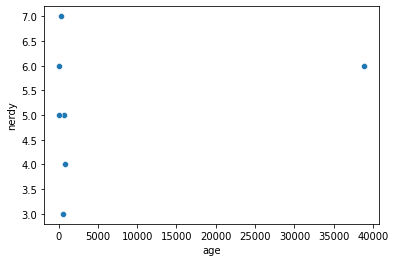

In [100]:
fig, ax = plt.subplots()
sns.scatterplot(x = train[(train['age'] == 38822) | \
                          (train['age'] == 722) | \
                          (train['age'] == 545)| (train['age'] == 374) | \
                          (train['age'] == 809) | (train['age'] == 116) | (train['age'] == 123)]['age'], y=train['nerdy'])

first taking value 38822. It can possibly be something from age 38, 88, 82, 22

In [101]:
que_cols =  ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'nerdy', 'education', 'voted','married', 'urban', 'familysize', 'country']
train[train['age'] == 38822][que_cols].loc[:, 'Q17']

6487    2
Name: Q17, dtype: int64

This person has replayed Q19 as 3. That means he has played video games. So it is rarely possible for his age to be 88 or 82. So we have 38 and 22. Also considering que17, i think it is 38.

In [102]:
train.loc[6487, 'age'] = 38

In [103]:
train[train['age'] == 116][que_cols].loc[:, 'Q19']

13934    5
Name: Q19, dtype: int64

COnsidering Q19 and Education, the person would be 16 years old

In [104]:
train.loc[13934, 'age'] = 16

In [105]:
train[train['age'] == 123][que_cols]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q24,Q25,Q26,nerdy,education,voted,married,urban,familysize,country
13059,4,4,5,5,5,4,5,5,5,4,...,5,3,5,5,2,2,1,3,3,CA


Considering the education, this guy seems like 23 years

In [106]:
train.loc[13059, 'age'] = 23

In [107]:
train[train['age'] == 374][que_cols].loc[:,'Q19']

13429    4
Name: Q19, dtype: int64

Seeing that he has played many video games, this guys seems to be 37

In [108]:
train.loc[13429, 'age'] = 37

In [109]:
train[train['age'] == 722][que_cols]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q24,Q25,Q26,nerdy,education,voted,married,urban,familysize,country
7723,1,1,3,3,5,3,5,1,5,1,...,5,5,5,5,3,1,2,2,3,US


This guy seems to be 72 by his data

In [110]:
train.loc[7723, 'age'] = 72

In [111]:
train[train['age'] == 545][que_cols]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q24,Q25,Q26,nerdy,education,voted,married,urban,familysize,country
10377,4,5,4,3,4,4,4,4,5,5,...,4,4,5,3,2,1,2,1,4,NO


We dont have enough data to distinguish between 54 and 45. So putting his age to be 54.

In [112]:
train.loc[10377, 'age'] = 54

In [113]:
train[train['age'] == 809][que_cols]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q24,Q25,Q26,nerdy,education,voted,married,urban,familysize,country
13726,2,2,4,2,3,2,2,5,2,4,...,2,2,3,4,4,2,1,2,1,GB


Considering its education, this person cant be 09

In [114]:
train.loc[13726, 'age'] = 80

In [115]:
train['age'].unique()

array([16, 19, 24, 56, 18, 48, 17, 28, 21, 15, 32, 50, 27, 14, 20, 46, 22,
       26, 30, 44, 42, 39, 41, 52, 35, 33, 40, 25, 37, 47, 45, 23, 54, 29,
       13, 34, 43, 31, 72, 51, 62, 66, 38, 63, 49, 53, 36, 65, 69, 74, 64,
       55, 60, 67, 59, 58, 57, 61, 79, 83, 68, 77, 90, 71, 70, 81, 73, 75,
       82, 76, 78, 99, 80])

In [116]:
test['age'].unique()

array([ 23,  24,  14,  65,  29,  19,  15,  13,  16,  20,  18,  25,  27,
        22,  37,  50,  44,  31,  47,  48,  35,  30,  46,  41,  21,  17,
        40,  28,  32,  34,  64,  52,  54,  56,  33,  36,  51,  26,  60,
        42,  63,  67,  43,  38,  61,  49,  39,  72,  68,  57,  66, 155,
        45,  53,  59,  70,  62,  55,  58,  74,  78,  73,  88,  77,  99,
       336, 100,  69,  80,  75])

In [117]:
que_test_cols =  ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'education', 'voted','married', 'urban', 'familysize', 'country']
test[test['age'] == 155][que_test_cols].loc[:,'Q25']

566    4
Name: Q25, dtype: int64

In [118]:
test[test['age'] == 155][que_test_cols]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q23,Q24,Q25,Q26,education,voted,married,urban,familysize,country
566,3,4,4,3,3,4,4,5,3,4,...,4,3,4,4,2,2,1,3,2,ID


This boy seems like 15

In [119]:
test.loc[566, 'age'] = 15

In [120]:
test[test['age'] == 336][que_test_cols]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q23,Q24,Q25,Q26,education,voted,married,urban,familysize,country
4142,4,5,4,4,5,5,5,4,4,5,...,4,5,5,5,3,1,1,1,2,BW


No data to distinguish between 33 and 36. Putting it on 33

In [121]:
test.loc[4142, 'age'] = 33

In [122]:
train['age'].unique()

array([16, 19, 24, 56, 18, 48, 17, 28, 21, 15, 32, 50, 27, 14, 20, 46, 22,
       26, 30, 44, 42, 39, 41, 52, 35, 33, 40, 25, 37, 47, 45, 23, 54, 29,
       13, 34, 43, 31, 72, 51, 62, 66, 38, 63, 49, 53, 36, 65, 69, 74, 64,
       55, 60, 67, 59, 58, 57, 61, 79, 83, 68, 77, 90, 71, 70, 81, 73, 75,
       82, 76, 78, 99, 80])

In [123]:
test['age'].unique()

array([ 23,  24,  14,  65,  29,  19,  15,  13,  16,  20,  18,  25,  27,
        22,  37,  50,  44,  31,  47,  48,  35,  30,  46,  41,  21,  17,
        40,  28,  32,  34,  64,  52,  54,  56,  33,  36,  51,  26,  60,
        42,  63,  67,  43,  38,  61,  49,  39,  72,  68,  57,  66,  45,
        53,  59,  70,  62,  55,  58,  74,  78,  73,  88,  77,  99, 100,
        69,  80,  75])

<AxesSubplot:xlabel='nerdy', ylabel='age'>

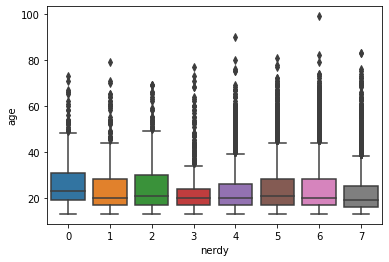

In [124]:
sns.boxplot(x=train['nerdy'], y=train['age'])

### Intro Test and Survey Elapses

In [125]:
ela = ['introelapse', 'testelapse' ,'surveyelapse']

In [126]:
train[ela]

,introelapse,testelapse,surveyelapse
0,3,85,155
1,23,148,230
2,267,87,176
3,5,94,181
4,25,115,127
...,...,...,...
15130,58,133,240
15131,3,63,129
15132,6,105,156
15133,22,61,108


In [127]:
pd.set_option('float_format', '{:f}'.format)
train.describe()[ela]

,introelapse,testelapse,surveyelapse
count,15135.000000,15135.000000,15135.000000
mean,710.328510,381.117014,1508.271292
std,15996.164208,8919.843975,52669.095519
min,1.000000,1.000000,2.000000
25%,4.000000,81.500000,126.000000
50%,10.000000,105.000000,163.000000
75%,37.000000,140.000000,216.000000
max,1381016.000000,698533.000000,4498662.000000


We can make a new feature known as total time (in minutes) which will technically be sum of all the times

In [128]:
train['total_time_min'] = train[ela].sum(axis = 1) / 60

In [129]:
ela = ['introelapse', 'testelapse' ,'surveyelapse', 'total_time_min']
train.describe()[ela]

,introelapse,testelapse,surveyelapse,total_time_min
count,15135.000000,15135.000000,15135.000000,15135.000000
mean,710.328510,381.117014,1508.271292,43.328614
std,15996.164208,8919.843975,52669.095519,931.460911
min,1.000000,1.000000,2.000000,1.350000
25%,4.000000,81.500000,126.000000,4.050000
50%,10.000000,105.000000,163.000000,5.333333
75%,37.000000,140.000000,216.000000,7.766667
max,1381016.000000,698533.000000,4498662.000000,74979.766667


As we can see, the max time is nearly 75k minutes, i.e. 125 hours. That is technically not possible. Avg time to fill a survey acc. to internet is nearly 20 min. Consider the worst case scenerio to be 120 mins to fill an online survey, we need to clip these values. For every row having total time above 120, we will clip them to the mean of the remaining rows.

In [130]:
train[train['total_time_min'] <= 120]['total_time_min'].mean()

8.04080625671319

In [131]:
train[train['total_time_min'] <= 120]['introelapse'].mean()

142.88500268528463

In [132]:
train[train['total_time_min'] <= 120]['testelapse'].mean()

142.24113856068743

In [133]:
train[train['total_time_min'] <= 120]['surveyelapse'].mean()

197.32223415682063

In [134]:
wrong_time = []
for x in range(train.shape[0]):
    if train.loc[x, 'total_time_min'] > 120:
        train.loc[x, 'total_time_min'] = 8.04080625671319
        train.loc[x, 'introelapse'] = 142.88500268528463
        train.loc[x, 'testelapse'] = 142.24113856068743
        train.loc[x, 'surveyelapse'] = 197.32223415682063
        wrong_time.append(x)

In [135]:
train.describe()[ela]

,introelapse,testelapse,surveyelapse,total_time_min
count,15135.000000,15135.000000,15135.000000,15135.000000
mean,142.885003,142.241139,197.322234,8.040806
std,493.361888,237.899312,217.746804,9.968240
min,1.000000,1.000000,2.000000,1.350000
25%,4.000000,82.000000,126.000000,4.050000
50%,10.000000,106.000000,164.000000,5.333333
75%,38.000000,141.000000,214.000000,7.766667
max,7020.000000,6978.000000,6622.000000,119.450000


In [136]:
ela_test = ['introelapse', 'testelapse' ,'surveyelapse']
test['total_time_min'] = test[ela_test].sum(axis = 1) / 60

In [137]:
ela_test = ['introelapse', 'testelapse' ,'surveyelapse', 'total_time_min']
test.describe()[ela_test]

,introelapse,testelapse,surveyelapse,total_time_min
count,10091.000000,10091.000000,10091.000000,10091.000000
mean,1044.920721,411.692003,4234.128530,94.845688
std,17019.474494,9897.959719,213259.059164,3584.348750
min,0.000000,23.000000,4.000000,1.566667
25%,4.000000,82.000000,127.000000,4.100000
50%,10.000000,105.000000,165.000000,5.383333
75%,39.000000,141.000000,217.000000,8.000000
max,855030.000000,679872.000000,15166994.000000,252811.483333


In [138]:
print(test[test['total_time_min'] <= 120]['total_time_min'].mean())
print(test[test['total_time_min'] <= 120]['introelapse'].mean())
print(test[test['total_time_min'] <= 120]['testelapse'].mean())
print(test[test['total_time_min'] <= 120]['surveyelapse'].mean())

8.486555566743814
167.22001812506292
144.04229181351323
197.93102406605578


In [139]:
wrong_time_test = []
for x in range(test.shape[0]):
    if test.loc[x, 'total_time_min'] > 120:
        test.loc[x, 'total_time_min'] = 8.486555566743814
        test.loc[x, 'introelapse'] = 167.22001812506292
        test.loc[x, 'testelapse'] = 144.04229181351323
        test.loc[x, 'surveyelapse'] = 197.93102406605578
        wrong_time_test.append(x)

In [140]:
test.describe()[ela_test]

,introelapse,testelapse,surveyelapse,total_time_min
count,10091.000000,10091.000000,10091.000000,10091.000000
mean,167.220018,144.042292,197.931024,8.486556
std,564.856154,245.768859,206.119506,10.970255
min,0.000000,23.000000,4.000000,1.566667
25%,4.000000,83.000000,127.000000,4.100000
50%,10.000000,106.000000,166.000000,5.383333
75%,39.000000,142.000000,214.000000,8.000000
max,6835.000000,6920.000000,6279.000000,119.116667


### Country

In [141]:
train['country']

0          US
1          CA
2          CH
3          US
4          NL
         ... 
15130      MX
15131      US
15132    NONE
15133      US
15134      US
Name: country, Length: 15135, dtype: object

In [142]:
train['country'].unique()

array(['US', 'CA', 'CH', 'NL', 'AU', 'IL', 'IN', 'GB', 'SG', 'FI', 'SA',
       'BE', 'DE', 'CZ', 'ID', 'NO', 'TH', 'PK', 'SE', 'VE', 'ZW', 'AT',
       'PL', 'PH', 'TT', 'IT', 'EE', 'BG', 'ES', 'MY', 'NONE', 'IE', 'GR',
       'GU', 'BR', 'MX', 'RU', 'AR', 'FR', 'HU', 'TR', 'PT', 'AM', 'RS',
       'KR', 'TW', 'MO', 'PE', 'VN', 'CL', 'RO', 'CR', 'DK', 'HK', 'ZA',
       'PR', 'NG', 'LV', 'LB', 'AE', 'KE', 'NZ', 'TZ', 'JO', 'SK', 'LT',
       'KW', 'SI', 'MA', 'IR', 'OM', 'UA', 'JP', 'PG', 'DZ', 'HR', 'GE',
       'IS', 'BW', 'GY', 'CO', 'EG', 'UY', 'PY', 'NP', 'GT', 'AL', 'BD',
       'CN', 'MT', 'BA', 'BN', 'BY', 'BS', 'BO', 'MK', 'GL', 'SZ', 'BB',
       'BZ', 'SY', 'LU', 'QA', 'DO', 'AZ', 'MG', 'HN', 'GH', 'ET', 'BH',
       'MW', 'CY', 'IM', 'TN', 'JM', 'LK', 'AF', 'VG', 'JE', 'AG', 'GD',
       'HT', 'ZM', 'RE', 'EC', 'MD', 'MU', 'SD', 'SV', 'FJ', 'MZ', 'MV',
       'FM', 'BF', 'RW', 'IQ', 'SL', 'CW', 'AX'], dtype=object)

In [143]:
test['country'].unique()

array(['BR', 'DE', 'US', 'GB', 'GR', 'CA', 'AU', 'FI', 'NO', 'ID', 'PL',
       'DK', 'NL', 'JP', 'IL', 'SG', 'CO', 'KE', 'NONE', 'FR', 'PT', 'CH',
       'IN', 'TH', 'MX', 'RO', 'SE', 'MY', 'AT', 'IE', 'LU', 'PK', 'AR',
       'RS', 'PH', 'ES', 'TR', 'IT', 'TT', 'DO', 'AE', 'NZ', 'HN', 'ZA',
       'BG', 'RU', 'KR', 'HU', 'DZ', 'BE', 'LT', 'HR', 'SK', 'SA', 'VN',
       'EC', 'BS', 'CR', 'UA', 'MU', 'HK', 'SI', 'GE', 'CL', 'VE', 'CZ',
       'MN', 'VU', 'NP', 'IR', 'PR', 'BY', 'BA', 'ME', 'PA', 'IS', 'KW',
       'NG', 'BN', 'UY', 'VI', 'LY', 'MK', 'RE', 'ZM', 'IM', 'LV', 'CN',
       'PY', 'TW', 'JO', 'PE', 'EG', 'BD', 'QA', 'EE', 'MA', 'LB', 'KZ',
       'SZ', 'AL', 'JM', 'GT', 'PS', 'TN', 'CY', 'SS', 'BW', 'GH', 'KH',
       'GU', 'MP', 'SD', 'BB', 'AZ', 'FO', 'NI', 'MT', 'CW', 'GY', 'FJ',
       'LA', 'BH', 'MZ', 'IQ', 'UG', 'MD', 'LK', 'KY', 'AO', 'SV', 'SY',
       'LC', 'GF', 'MC'], dtype=object)

In [144]:
country_not_in_test = []
for x in test['country'].unique():
    if x not in train['country'].unique():
        country_not_in_test.append(x)

In [145]:
len(country_not_in_test)

20

In [146]:
country_not_in_test

['MN',
 'VU',
 'ME',
 'PA',
 'VI',
 'LY',
 'KZ',
 'PS',
 'SS',
 'KH',
 'MP',
 'FO',
 'NI',
 'LA',
 'UG',
 'KY',
 'AO',
 'LC',
 'GF',
 'MC']

There are 24 countries which are in train but not in test. This countries will create a problem while label encoding. So what we can do is encode the train as it is. Then encode the test countries which are in train with the same mapping and the remaining countries with an exclusively different mapping

In [147]:
from sklearn.preprocessing import LabelEncoder

In [148]:
test_indx_for_train = []
for x in range(test.shape[0]):
    if test.loc[x, 'country']  in train['country'].unique():
        test_indx_for_train.append(x)

In [149]:
len(test_indx_for_train)

10063

In [150]:
test.shape

(10091, 83)

In [151]:
test['country']

0        BR
1        DE
2        US
3        US
4        DE
         ..
10086    US
10087    US
10088    SG
10089    NO
10090    CA
Name: country, Length: 10091, dtype: object

In [152]:
test_in_train = test.loc[test_indx_for_train, :]

In [153]:
test_indx_not_in_train = []
for x in range(test.shape[0]):
    if test.loc[x, 'country']  not in train['country'].unique():
        test_indx_not_in_train.append(x)

In [154]:
len(test_indx_not_in_train)

28

In [155]:
test_not_in_train = test.loc[test_indx_not_in_train, :]

In [156]:
test_not_in_train['country']

918      MN
947      VU
1128     ME
1160     PA
1429     VI
1579     LY
3002     KZ
3115     KZ
3280     PS
3964     SS
4217     KH
4383     MP
4423     LY
4693     FO
4762     NI
5284     FO
5939     LA
7130     UG
7557     KY
7721     PA
8132     AO
8191     KZ
8651     LC
9011     FO
9554     UG
9805     GF
9947     PA
10043    MC
Name: country, dtype: object

In [157]:
le = LabelEncoder()
country_enc = le.fit_transform(train['country'])
train['country_enc'] = country_enc

In [158]:
train

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,race_hispanic,race_nativeam,race_nativeau,race_other,nerdy,que_score,wrong_race,tipi_score,total_time_min,country_enc
0,811406,4,5,5,4,5,4,5,3,4,...,0,0,0,0,6,0.823077,0,43,4.050000,131
1,248038,4,3,3,2,5,3,3,5,4,...,0,0,0,0,4,0.638462,0,47,6.683333,24
2,847531,5,5,5,5,5,5,5,5,4,...,0,0,0,1,0,0.838462,1,51,8.833333,25
3,708422,1,1,3,1,4,4,5,1,3,...,0,0,0,0,4,0.623077,0,44,4.666667,131
4,269597,5,1,2,5,4,2,4,4,3,...,0,0,0,0,5,0.592308,0,43,4.450000,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15130,196094,4,4,3,3,5,2,4,4,5,...,1,0,0,0,4,0.638462,0,47,7.183333,90
15131,17413,5,5,5,4,5,4,5,4,4,...,0,0,0,0,7,0.861538,0,37,3.250000,131
15132,398852,4,0,2,1,5,2,5,1,4,...,0,0,0,0,5,0.615385,0,44,4.450000,96
15133,479759,4,4,5,3,5,5,5,2,5,...,0,0,0,0,6,0.730769,0,41,3.183333,131


In [159]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'AE': 0, 'AF': 1, 'AG': 2, 'AL': 3, 'AM': 4, 'AR': 5, 'AT': 6, 'AU': 7, 'AX': 8, 'AZ': 9, 'BA': 10, 'BB': 11, 'BD': 12, 'BE': 13, 'BF': 14, 'BG': 15, 'BH': 16, 'BN': 17, 'BO': 18, 'BR': 19, 'BS': 20, 'BW': 21, 'BY': 22, 'BZ': 23, 'CA': 24, 'CH': 25, 'CL': 26, 'CN': 27, 'CO': 28, 'CR': 29, 'CW': 30, 'CY': 31, 'CZ': 32, 'DE': 33, 'DK': 34, 'DO': 35, 'DZ': 36, 'EC': 37, 'EE': 38, 'EG': 39, 'ES': 40, 'ET': 41, 'FI': 42, 'FJ': 43, 'FM': 44, 'FR': 45, 'GB': 46, 'GD': 47, 'GE': 48, 'GH': 49, 'GL': 50, 'GR': 51, 'GT': 52, 'GU': 53, 'GY': 54, 'HK': 55, 'HN': 56, 'HR': 57, 'HT': 58, 'HU': 59, 'ID': 60, 'IE': 61, 'IL': 62, 'IM': 63, 'IN': 64, 'IQ': 65, 'IR': 66, 'IS': 67, 'IT': 68, 'JE': 69, 'JM': 70, 'JO': 71, 'JP': 72, 'KE': 73, 'KR': 74, 'KW': 75, 'LB': 76, 'LK': 77, 'LT': 78, 'LU': 79, 'LV': 80, 'MA': 81, 'MD': 82, 'MG': 83, 'MK': 84, 'MO': 85, 'MT': 86, 'MU': 87, 'MV': 88, 'MW': 89, 'MX': 90, 'MY': 91, 'MZ': 92, 'NG': 93, 'NL': 94, 'NO': 95, 'NONE': 96, 'NP': 97, 'NZ': 98, 'OM': 99, 'PE': 1

In [160]:
country_enc_test = le.transform(test_in_train['country'])
test_in_train['country_enc'] = country_enc_test

In [161]:
test_in_train

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,race_white,race_hispanic,race_nativeam,race_nativeau,race_other,que_score,wrong_race,tipi_score,total_time_min,country_enc
0,869598,3,5,4,3,5,5,5,4,4,...,1,1,0,0,0,0.861538,0,37,5.800000,19
1,682098,4,5,5,4,5,3,5,4,4,...,1,0,0,0,0,0.715385,0,46,21.200000,33
2,278454,3,2,5,2,3,3,2,5,4,...,1,0,0,0,0,0.615385,0,41,4.783333,131
3,119007,0,5,5,4,3,5,5,1,5,...,1,0,0,0,0,0.653846,0,29,7.050000,131
4,49950,5,5,5,4,5,4,5,5,5,...,1,0,0,0,1,0.815385,0,46,8.516667,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10086,702877,5,5,5,5,5,5,1,5,1,...,1,0,0,0,0,0.738462,0,35,3.100000,131
10087,183546,5,5,5,4,5,5,5,5,3,...,1,0,0,0,0,0.915385,0,39,3.433333,131
10088,435694,5,4,5,5,2,4,3,5,3,...,0,0,0,0,0,0.738462,0,46,5.483333,117
10089,825049,4,2,4,2,5,3,5,3,5,...,1,0,0,0,0,0.684615,0,44,15.683333,95


In [162]:
le.classes_

array(['AE', 'AF', 'AG', 'AL', 'AM', 'AR', 'AT', 'AU', 'AX', 'AZ', 'BA',
       'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BN', 'BO', 'BR', 'BS', 'BW',
       'BY', 'BZ', 'CA', 'CH', 'CL', 'CN', 'CO', 'CR', 'CW', 'CY', 'CZ',
       'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'ET', 'FI', 'FJ',
       'FM', 'FR', 'GB', 'GD', 'GE', 'GH', 'GL', 'GR', 'GT', 'GU', 'GY',
       'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IM', 'IN', 'IQ',
       'IR', 'IS', 'IT', 'JE', 'JM', 'JO', 'JP', 'KE', 'KR', 'KW', 'LB',
       'LK', 'LT', 'LU', 'LV', 'MA', 'MD', 'MG', 'MK', 'MO', 'MT', 'MU',
       'MV', 'MW', 'MX', 'MY', 'MZ', 'NG', 'NL', 'NO', 'NONE', 'NP', 'NZ',
       'OM', 'PE', 'PG', 'PH', 'PK', 'PL', 'PR', 'PT', 'PY', 'QA', 'RE',
       'RO', 'RS', 'RU', 'RW', 'SA', 'SD', 'SE', 'SG', 'SI', 'SK', 'SL',
       'SV', 'SY', 'SZ', 'TH', 'TN', 'TR', 'TT', 'TW', 'TZ', 'UA', 'US',
       'UY', 'VE', 'VG', 'VN', 'ZA', 'ZM', 'ZW'], dtype=object)

In [163]:
le2 = LabelEncoder()

In [164]:
unique_country = le2.fit_transform(test_not_in_train['country'])
test_not_in_train['country_enc'] = unique_country

In [165]:
test_not_in_train['country_enc'].unique()

array([11, 19, 10, 14, 18,  8,  5, 15, 16,  3, 12,  1, 13,  6, 17,  4,  0,
        7,  2,  9])

In [166]:
test_not_in_train['country_enc'] += 139

In [167]:
test_not_in_train['country_enc'].unique()

array([150, 158, 149, 153, 157, 147, 144, 154, 155, 142, 151, 140, 152,
       145, 156, 143, 139, 146, 141, 148])

In [168]:
test_enc = pd.concat([test_in_train, test_not_in_train])

In [169]:
test.index

RangeIndex(start=0, stop=10091, step=1)

In [170]:
test

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,race_black,race_white,race_hispanic,race_nativeam,race_nativeau,race_other,que_score,wrong_race,tipi_score,total_time_min
0,869598,3,5,4,3,5,5,5,4,4,...,0,1,1,0,0,0,0.861538,0,37,5.800000
1,682098,4,5,5,4,5,3,5,4,4,...,0,1,0,0,0,0,0.715385,0,46,21.200000
2,278454,3,2,5,2,3,3,2,5,4,...,0,1,0,0,0,0,0.615385,0,41,4.783333
3,119007,0,5,5,4,3,5,5,1,5,...,0,1,0,0,0,0,0.653846,0,29,7.050000
4,49950,5,5,5,4,5,4,5,5,5,...,0,1,0,0,0,1,0.815385,0,46,8.516667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10086,702877,5,5,5,5,5,5,1,5,1,...,0,1,0,0,0,0,0.738462,0,35,3.100000
10087,183546,5,5,5,4,5,5,5,5,3,...,0,1,0,0,0,0,0.915385,0,39,3.433333
10088,435694,5,4,5,5,2,4,3,5,3,...,0,0,0,0,0,0,0.738462,0,46,5.483333
10089,825049,4,2,4,2,5,3,5,3,5,...,0,1,0,0,0,0,0.684615,0,44,15.683333


In [171]:
test_enc=test_enc.reindex(test.index)

In [172]:
test_enc

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,race_white,race_hispanic,race_nativeam,race_nativeau,race_other,que_score,wrong_race,tipi_score,total_time_min,country_enc
0,869598,3,5,4,3,5,5,5,4,4,...,1,1,0,0,0,0.861538,0,37,5.800000,19
1,682098,4,5,5,4,5,3,5,4,4,...,1,0,0,0,0,0.715385,0,46,21.200000,33
2,278454,3,2,5,2,3,3,2,5,4,...,1,0,0,0,0,0.615385,0,41,4.783333,131
3,119007,0,5,5,4,3,5,5,1,5,...,1,0,0,0,0,0.653846,0,29,7.050000,131
4,49950,5,5,5,4,5,4,5,5,5,...,1,0,0,0,1,0.815385,0,46,8.516667,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10086,702877,5,5,5,5,5,5,1,5,1,...,1,0,0,0,0,0.738462,0,35,3.100000,131
10087,183546,5,5,5,4,5,5,5,5,3,...,1,0,0,0,0,0.915385,0,39,3.433333,131
10088,435694,5,4,5,5,2,4,3,5,3,...,0,0,0,0,0,0.738462,0,46,5.483333,117
10089,825049,4,2,4,2,5,3,5,3,5,...,1,0,0,0,0,0.684615,0,44,15.683333,95


In [173]:
train['major']

0                                   NONE
1                                   NONE
2                      Buisiness Studies
3                              economics
4        Currently attending programming
                      ...               
15130                             design
15131        Game Design and Development
15132                           medicine
15133                       Anthropology
15134                         psychology
Name: major, Length: 15135, dtype: object

In [174]:
train.to_csv("train_pre.csv",index=False )

In [175]:
test_enc.to_csv("test_pre.csv", index=False)

### Reviewing more columns

In [176]:
train = pd.read_csv('train_pre.csv')
test = pd.read_csv('test_pre.csv')

In [177]:
train.columns

Index(['id', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'country', 'introelapse',
       'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2',
       'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'screenw', 'screenh', 'hand',
       'religion', 'orientation', 'voted', 'married', 'familysize', 'major',
       'race_arab', 'race_asian', 'race_black', 'race_white', 'race_hispanic',
       'race_nativeam', 'race_nativeau', 'race_other', 'nerdy', 'que_score',
       'wrong_race', 'tipi_score', 'total_time_min', 'country_enc'],
      dtype='object')

### Screenh and screenw columns

In [178]:
train[['screenh', 'screenw']].corr()

,screenh,screenw
screenh,1.000000,0.735425
screenw,0.735425,1.000000


These features are in pixels. Javascript returns screen width and screen height in pixels

In [179]:
train['screenh'].value_counts()

768     3255
640     1817
1080    1656
900     1413
667     1114
        ... 
217        1
427        1
737        1
945        1
758        1
Name: screenh, Length: 240, dtype: int64

In [180]:
train['screenw'].value_counts()

1366    3027
360     1914
1920    1795
1280    1571
375     1148
        ... 
1094       1
1548       1
1232       1
376        1
2462       1
Name: screenw, Length: 221, dtype: int64

<AxesSubplot:xlabel='nerdy', ylabel='screenh'>

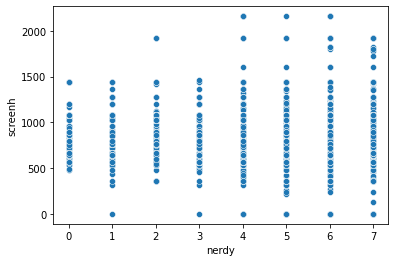

In [181]:
sns.scatterplot(x = train['nerdy'], y=train['screenh'])

<AxesSubplot:xlabel='nerdy', ylabel='screenw'>

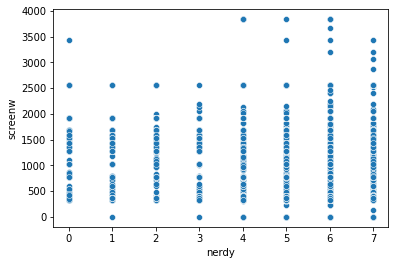

In [182]:
sns.scatterplot(x = train['nerdy'], y=train['screenw'])

<AxesSubplot:xlabel='nerdy'>

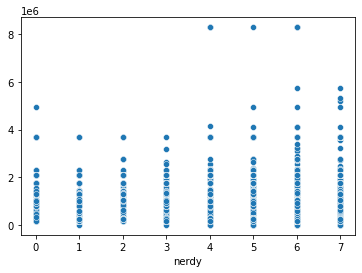

In [183]:
sns.scatterplot(x = train['nerdy'] , y=train['screenw'] * train['screenh'])

### Major Column

In [184]:
len(train['major'].unique())

2288

In [185]:
len(test['major'].unique())

1628

In [186]:
train['major'].value_counts()

NONE                           6659
Psychology                      399
psychology                      371
English                         322
Computer Science                224
                               ... 
Video game design                 1
Fine arts and English lit         1
Aesthetics                        1
Industrial design                 1
Game Design and Development       1
Name: major, Length: 2288, dtype: int64

In [187]:
test['major'].value_counts()

NONE                                         4388
Psychology                                    287
psychology                                    235
English                                       231
Computer Science                              148
                                             ... 
Theoretical Physics                             1
master in teaching science and technology       1
Electronic Engineering                          1
music directors                                 1
Theatre and music                               1
Name: major, Length: 1628, dtype: int64

In [188]:
common_major = []
for x in test['major'].unique():
    if x in train['major'].unique():
        common_major.append(x)

In [189]:
len(common_major)

590

In [190]:
train[train['major'] == 'NONE']['nerdy'].value_counts()

6    1910
7    1847
5    1480
4     863
3     236
2     167
1     123
0      33
Name: nerdy, dtype: int64

In [191]:
train['nerdy'].value_counts()

6    4460
7    3896
5    3513
4    1802
3     504
2     386
1     304
0     270
Name: nerdy, dtype: int64

We can create a feature known as no_major for people with no major. This will help our model to consider information from this column even if we remove it. no_major = 1 means major is NONE. 

In [192]:
train['no_major'] = 0
for x in range(train.shape[0]):
       if  train.loc[x, 'major'] == 'NONE':
            train.loc[x ,'no_major'] = 1

In [193]:
train['no_major'].value_counts()

0    8476
1    6659
Name: no_major, dtype: int64

In [194]:
test['no_major'] = 0
for x in range(test.shape[0]):
       if  test.loc[x, 'major'] == 'NONE':
            test.loc[x ,'no_major'] = 1

In [195]:
test['no_major'].value_counts()

0    5703
1    4388
Name: no_major, dtype: int64

In [196]:
train

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,race_nativeam,race_nativeau,race_other,nerdy,que_score,wrong_race,tipi_score,total_time_min,country_enc,no_major
0,811406,4,5,5,4,5,4,5,3,4,...,0,0,0,6,0.823077,0,43,4.050000,131,1
1,248038,4,3,3,2,5,3,3,5,4,...,0,0,0,4,0.638462,0,47,6.683333,24,1
2,847531,5,5,5,5,5,5,5,5,4,...,0,0,1,0,0.838462,1,51,8.833333,25,0
3,708422,1,1,3,1,4,4,5,1,3,...,0,0,0,4,0.623077,0,44,4.666667,131,0
4,269597,5,1,2,5,4,2,4,4,3,...,0,0,0,5,0.592308,0,43,4.450000,94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15130,196094,4,4,3,3,5,2,4,4,5,...,0,0,0,4,0.638462,0,47,7.183333,90,0
15131,17413,5,5,5,4,5,4,5,4,4,...,0,0,0,7,0.861538,0,37,3.250000,131,0
15132,398852,4,0,2,1,5,2,5,1,4,...,0,0,0,5,0.615385,0,44,4.450000,96,0
15133,479759,4,4,5,3,5,5,5,2,5,...,0,0,0,6,0.730769,0,41,3.183333,131,0


In [197]:
train.columns

Index(['id', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'country', 'introelapse',
       'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2',
       'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'screenw', 'screenh', 'hand',
       'religion', 'orientation', 'voted', 'married', 'familysize', 'major',
       'race_arab', 'race_asian', 'race_black', 'race_white', 'race_hispanic',
       'race_nativeam', 'race_nativeau', 'race_other', 'nerdy', 'que_score',
       'wrong_race', 'tipi_score', 'total_time_min', 'country_enc',
       'no_major'],
      dtype='object')

### Countries

We will divide all countries into their continents. This would help to retain the demographic based relations

In [198]:
train['country'].unique()

array(['US', 'CA', 'CH', 'NL', 'AU', 'IL', 'IN', 'GB', 'SG', 'FI', 'SA',
       'BE', 'DE', 'CZ', 'ID', 'NO', 'TH', 'PK', 'SE', 'VE', 'ZW', 'AT',
       'PL', 'PH', 'TT', 'IT', 'EE', 'BG', 'ES', 'MY', 'NONE', 'IE', 'GR',
       'GU', 'BR', 'MX', 'RU', 'AR', 'FR', 'HU', 'TR', 'PT', 'AM', 'RS',
       'KR', 'TW', 'MO', 'PE', 'VN', 'CL', 'RO', 'CR', 'DK', 'HK', 'ZA',
       'PR', 'NG', 'LV', 'LB', 'AE', 'KE', 'NZ', 'TZ', 'JO', 'SK', 'LT',
       'KW', 'SI', 'MA', 'IR', 'OM', 'UA', 'JP', 'PG', 'DZ', 'HR', 'GE',
       'IS', 'BW', 'GY', 'CO', 'EG', 'UY', 'PY', 'NP', 'GT', 'AL', 'BD',
       'CN', 'MT', 'BA', 'BN', 'BY', 'BS', 'BO', 'MK', 'GL', 'SZ', 'BB',
       'BZ', 'SY', 'LU', 'QA', 'DO', 'AZ', 'MG', 'HN', 'GH', 'ET', 'BH',
       'MW', 'CY', 'IM', 'TN', 'JM', 'LK', 'AF', 'VG', 'JE', 'AG', 'GD',
       'HT', 'ZM', 'RE', 'EC', 'MD', 'MU', 'SD', 'SV', 'FJ', 'MZ', 'MV',
       'FM', 'BF', 'RW', 'IQ', 'SL', 'CW', 'AX'], dtype=object)

In [199]:
Asia = ['IL', 'IN', 'SG', 'ID', 'TH', 'PK', 'PH', 'MY', 'TR', 'AM', 'KR', 'TW', 'MO', 'VN' , 'HK', 'LB', 'AE', 'JO',
       'KW', 'IR','OM', 'JP', 'NP', 'BD', 'CN', 'BN', 'SY', 'QA', 'AZ', 'BH', 'LK', 'AF', 'MV', 'IQ', 'MN', 'KZ', 'PS', 'KH',
       'LA']

NA = ['US', 'CA', 'MX', 'CR', 'PR', 'GT', 'BS', 'GL', 'BB', 'BZ','DO', 'HN', 'JM','VG', 'AG', 'GD', 'HT', 'SV', 'VI', 'NI', 'KY', 'LC']

SA = ['VE', 'TT', 'BR', 'AR', 'PE', 'CL', 'GY', 'CO', 'UY', 'PY', 'BO', 'EC','CW', 'PA', 'GF']

AUS = ['GU', 'AU', 'NZ' ,'TZ', 'PG', 'DZ','FJ', 'FM', 'VU', 'MP' ]

AFR = ['SA', 'ZW', 'ZA', 'NG', 'KE', 'MA', 'BW', 'EG', 'SZ', 'MG', 'GH', 'ET', 'MW', 'TN', 'ZM', 'RE', 'MU', 'SD', 'MZ'
      ,'BF','RW', 'SL', 'LY', 'SS', 'UG', 'AO']

EU = ['CH', 'NL', 'GB', 'FI', 'BE', 'DE', 'CZ', 'NO', 'SE' ,'AT', 'PL', 'IT', 'EE', 'BG', 'ES', 'IE', 'GR', 'RU', 'FR', 'HU', 'PT', 'RS', 'RO'
     ,'DK', 'LV', 'SK', 'LT', 'SI', 'UA', 'HR', 'GE', 'IS', 'AL', 'MT', 'BA', 'BY', 'MK', 'LU', 'CY', 'IM', 'JE', 'MD', 'AX'
     , 'ME', 'FO','MC' ]

In [200]:
print(len(Asia) + len(SA) + len(NA) + len(AFR) + len(EU) + len(AUS))

158


In [201]:
test['country'].unique()

array(['BR', 'DE', 'US', 'GB', 'GR', 'CA', 'AU', 'FI', 'NO', 'ID', 'PL',
       'DK', 'NL', 'JP', 'IL', 'SG', 'CO', 'KE', 'NONE', 'FR', 'PT', 'CH',
       'IN', 'TH', 'MX', 'RO', 'SE', 'MY', 'AT', 'IE', 'LU', 'PK', 'AR',
       'RS', 'PH', 'ES', 'TR', 'IT', 'TT', 'DO', 'AE', 'NZ', 'HN', 'ZA',
       'BG', 'RU', 'KR', 'HU', 'DZ', 'BE', 'LT', 'HR', 'SK', 'SA', 'VN',
       'EC', 'BS', 'CR', 'UA', 'MU', 'HK', 'SI', 'GE', 'CL', 'VE', 'CZ',
       'MN', 'VU', 'NP', 'IR', 'PR', 'BY', 'BA', 'ME', 'PA', 'IS', 'KW',
       'NG', 'BN', 'UY', 'VI', 'LY', 'MK', 'RE', 'ZM', 'IM', 'LV', 'CN',
       'PY', 'TW', 'JO', 'PE', 'EG', 'BD', 'QA', 'EE', 'MA', 'LB', 'KZ',
       'SZ', 'AL', 'JM', 'GT', 'PS', 'TN', 'CY', 'SS', 'BW', 'GH', 'KH',
       'GU', 'MP', 'SD', 'BB', 'AZ', 'FO', 'NI', 'MT', 'CW', 'GY', 'FJ',
       'LA', 'BH', 'MZ', 'IQ', 'UG', 'MD', 'LK', 'KY', 'AO', 'SV', 'SY',
       'LC', 'GF', 'MC'], dtype=object)

In [202]:
train['continent'] = 0

In [203]:
for x in range(train.shape[0]):
    if train.loc[x,'country'] in Asia:
        train.loc[x , 'continent'] = 'Asia'
        
    elif train.loc[x,'country'] in NA:
        train.loc[x , 'continent'] = 'NA'
        
    elif train.loc[x,'country'] in SA:
        train.loc[x , 'continent'] = 'SA'
        
    elif train.loc[x,'country'] in AFR:
        train.loc[x , 'continent'] = 'Africa'
        
    elif train.loc[x,'country'] in EU:
        train.loc[x , 'continent'] = 'Europe'
        
    elif train.loc[x,'country'] in AUS:
        train.loc[x , 'continent'] = 'Aus'
        
    else:
        train.loc[x, 'continent'] = 'NONE'

In [204]:
train['continent'].value_counts()

NA        8673
Europe    3799
Asia      1181
Aus        709
SA         426
NONE       206
Africa     141
Name: continent, dtype: int64

In [205]:
test['continent'] = 0

In [206]:
for x in range(test.shape[0]):
    if test.loc[x,'country'] in Asia:
        test.loc[x , 'continent'] = 'Asia'
        
    elif test.loc[x,'country'] in NA:
        test.loc[x , 'continent'] = 'NA'
        
    elif test.loc[x,'country'] in SA:
        test.loc[x , 'continent'] = 'SA'
        
    elif test.loc[x,'country'] in AFR:
        test.loc[x , 'continent'] = 'Africa'
        
    elif test.loc[x,'country'] in EU:
        test.loc[x , 'continent'] = 'Europe'
        
    elif test.loc[x,'country'] in AUS:
        test.loc[x , 'continent'] = 'Aus'
        
    else:
        test.loc[x, 'continent'] = 'NONE'

In [207]:
test['continent'].value_counts()

NA        5781
Europe    2568
Asia       816
Aus        386
SA         324
NONE       117
Africa      99
Name: continent, dtype: int64

Now we can apply one_hot encoding in the continent column

In [208]:
train.to_csv("train_pre.csv",index=False )
test.to_csv("test_pre.csv",index=False )

In [209]:
train

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,race_nativeau,race_other,nerdy,que_score,wrong_race,tipi_score,total_time_min,country_enc,no_major,continent
0,811406,4,5,5,4,5,4,5,3,4,...,0,0,6,0.823077,0,43,4.050000,131,1,NA
1,248038,4,3,3,2,5,3,3,5,4,...,0,0,4,0.638462,0,47,6.683333,24,1,NA
2,847531,5,5,5,5,5,5,5,5,4,...,0,1,0,0.838462,1,51,8.833333,25,0,Europe
3,708422,1,1,3,1,4,4,5,1,3,...,0,0,4,0.623077,0,44,4.666667,131,0,NA
4,269597,5,1,2,5,4,2,4,4,3,...,0,0,5,0.592308,0,43,4.450000,94,0,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15130,196094,4,4,3,3,5,2,4,4,5,...,0,0,4,0.638462,0,47,7.183333,90,0,NA
15131,17413,5,5,5,4,5,4,5,4,4,...,0,0,7,0.861538,0,37,3.250000,131,0,NA
15132,398852,4,0,2,1,5,2,5,1,4,...,0,0,5,0.615385,0,44,4.450000,96,0,NONE
15133,479759,4,4,5,3,5,5,5,2,5,...,0,0,6,0.730769,0,41,3.183333,131,0,NA


In [210]:
test

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,race_nativeam,race_nativeau,race_other,que_score,wrong_race,tipi_score,total_time_min,country_enc,no_major,continent
0,869598,3,5,4,3,5,5,5,4,4,...,0,0,0,0.861538,0,37,5.800000,19,0,SA
1,682098,4,5,5,4,5,3,5,4,4,...,0,0,0,0.715385,0,46,21.200000,33,0,Europe
2,278454,3,2,5,2,3,3,2,5,4,...,0,0,0,0.615385,0,41,4.783333,131,1,NA
3,119007,0,5,5,4,3,5,5,1,5,...,0,0,0,0.653846,0,29,7.050000,131,0,NA
4,49950,5,5,5,4,5,4,5,5,5,...,0,0,1,0.815385,0,46,8.516667,33,0,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10086,702877,5,5,5,5,5,5,1,5,1,...,0,0,0,0.738462,0,35,3.100000,131,0,NA
10087,183546,5,5,5,4,5,5,5,5,3,...,0,0,0,0.915385,0,39,3.433333,131,0,NA
10088,435694,5,4,5,5,2,4,3,5,3,...,0,0,0,0.738462,0,46,5.483333,117,1,Asia
10089,825049,4,2,4,2,5,3,5,3,5,...,0,0,0,0.684615,0,44,15.683333,95,1,Europe


<AxesSubplot:xlabel='nerdy', ylabel='count'>

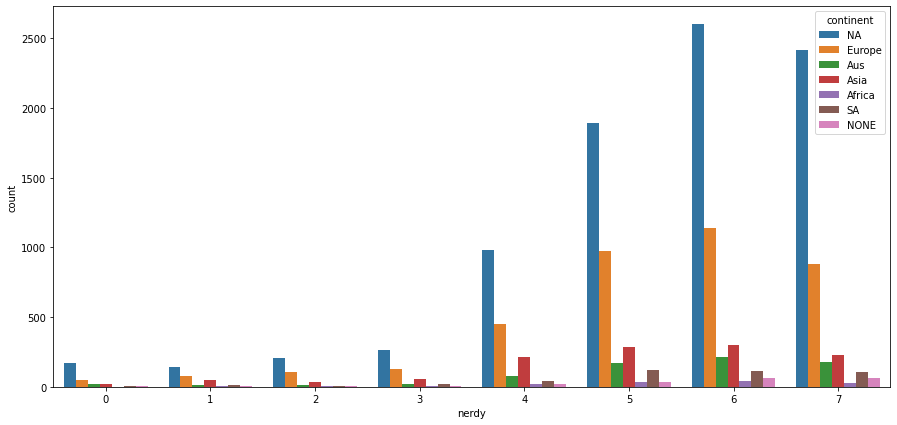

In [211]:
plt.figure(figsize = (15,7))
sns.countplot(x = train['nerdy'], hue = train['continent'])

As we can see, majority people from North America are more nerdy than others

Now we can one hot encode the continent columns

In [212]:
ohe_test = pd.get_dummies(test['continent'])

In [213]:
test_new = pd.concat([test, ohe_test], axis = 1)

In [214]:
test_new

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,country_enc,no_major,continent,Africa,Asia,Aus,Europe,NA,NONE,SA
0,869598,3,5,4,3,5,5,5,4,4,...,19,0,SA,0,0,0,0,0,0,1
1,682098,4,5,5,4,5,3,5,4,4,...,33,0,Europe,0,0,0,1,0,0,0
2,278454,3,2,5,2,3,3,2,5,4,...,131,1,NA,0,0,0,0,1,0,0
3,119007,0,5,5,4,3,5,5,1,5,...,131,0,NA,0,0,0,0,1,0,0
4,49950,5,5,5,4,5,4,5,5,5,...,33,0,Europe,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10086,702877,5,5,5,5,5,5,1,5,1,...,131,0,NA,0,0,0,0,1,0,0
10087,183546,5,5,5,4,5,5,5,5,3,...,131,0,NA,0,0,0,0,1,0,0
10088,435694,5,4,5,5,2,4,3,5,3,...,117,1,Asia,0,1,0,0,0,0,0
10089,825049,4,2,4,2,5,3,5,3,5,...,95,1,Europe,0,0,0,1,0,0,0


In [215]:
ohe_train = pd.get_dummies(train['continent'])
train_new = pd.concat([train, ohe_train], axis = 1)
train_new

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,country_enc,no_major,continent,Africa,Asia,Aus,Europe,NA,NONE,SA
0,811406,4,5,5,4,5,4,5,3,4,...,131,1,NA,0,0,0,0,1,0,0
1,248038,4,3,3,2,5,3,3,5,4,...,24,1,NA,0,0,0,0,1,0,0
2,847531,5,5,5,5,5,5,5,5,4,...,25,0,Europe,0,0,0,1,0,0,0
3,708422,1,1,3,1,4,4,5,1,3,...,131,0,NA,0,0,0,0,1,0,0
4,269597,5,1,2,5,4,2,4,4,3,...,94,0,Europe,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15130,196094,4,4,3,3,5,2,4,4,5,...,90,0,NA,0,0,0,0,1,0,0
15131,17413,5,5,5,4,5,4,5,4,4,...,131,0,NA,0,0,0,0,1,0,0
15132,398852,4,0,2,1,5,2,5,1,4,...,96,0,NONE,0,0,0,0,0,1,0
15133,479759,4,4,5,3,5,5,5,2,5,...,131,0,NA,0,0,0,0,1,0,0


In [216]:
train_old = train.copy()
test_old = test.copy()

In [217]:
train = train_new.copy()
test = test_new.copy()

In [218]:
train_new

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,country_enc,no_major,continent,Africa,Asia,Aus,Europe,NA,NONE,SA
0,811406,4,5,5,4,5,4,5,3,4,...,131,1,NA,0,0,0,0,1,0,0
1,248038,4,3,3,2,5,3,3,5,4,...,24,1,NA,0,0,0,0,1,0,0
2,847531,5,5,5,5,5,5,5,5,4,...,25,0,Europe,0,0,0,1,0,0,0
3,708422,1,1,3,1,4,4,5,1,3,...,131,0,NA,0,0,0,0,1,0,0
4,269597,5,1,2,5,4,2,4,4,3,...,94,0,Europe,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15130,196094,4,4,3,3,5,2,4,4,5,...,90,0,NA,0,0,0,0,1,0,0
15131,17413,5,5,5,4,5,4,5,4,4,...,131,0,NA,0,0,0,0,1,0,0
15132,398852,4,0,2,1,5,2,5,1,4,...,96,0,NONE,0,0,0,0,0,1,0
15133,479759,4,4,5,3,5,5,5,2,5,...,131,0,NA,0,0,0,0,1,0,0


In [219]:
train_new.to_csv("train_pre.csv",index=False )
test_new.to_csv("test_pre.csv",index=False )

In [220]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15135 entries, 0 to 15134
Data columns (total 94 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              15135 non-null  int64  
 1   Q1              15135 non-null  int64  
 2   Q2              15135 non-null  int64  
 3   Q3              15135 non-null  int64  
 4   Q4              15135 non-null  int64  
 5   Q5              15135 non-null  int64  
 6   Q6              15135 non-null  int64  
 7   Q7              15135 non-null  int64  
 8   Q8              15135 non-null  int64  
 9   Q9              15135 non-null  int64  
 10  Q10             15135 non-null  int64  
 11  Q11             15135 non-null  int64  
 12  Q12             15135 non-null  int64  
 13  Q13             15135 non-null  int64  
 14  Q14             15135 non-null  int64  
 15  Q15             15135 non-null  int64  
 16  Q16             15135 non-null  int64  
 17  Q17             15135 non-null 

### EDA

<AxesSubplot:xlabel='nerdy', ylabel='count'>

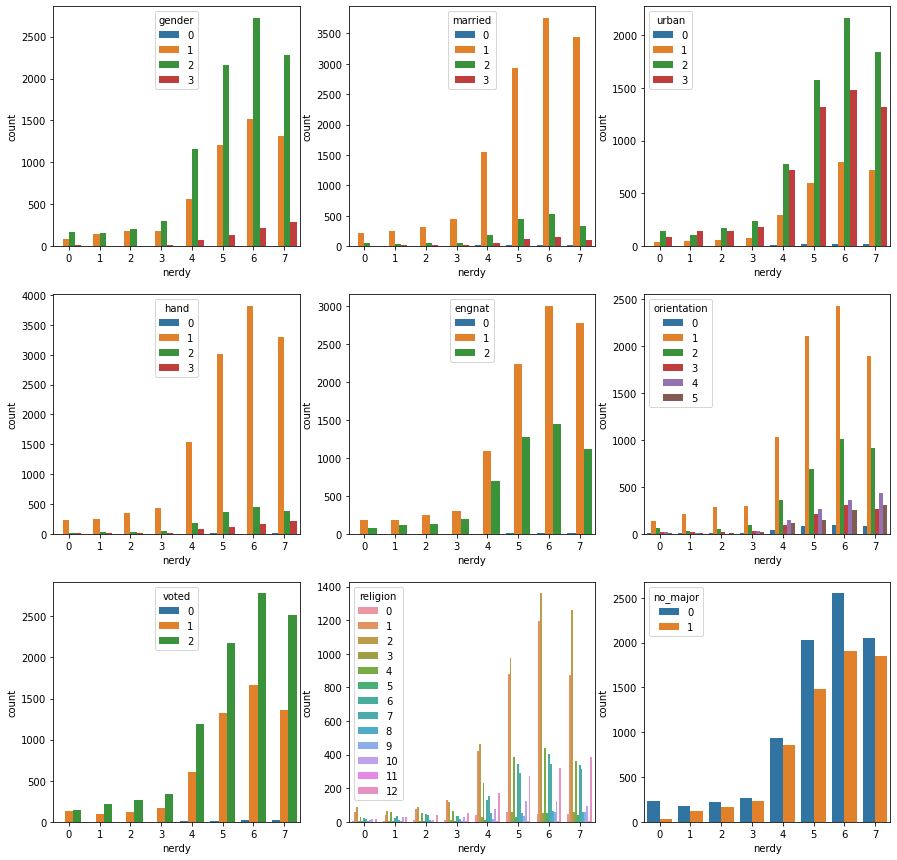

In [221]:
plt.figure(figsize = (15,15))

plt.subplot(3,3,1)
sns.countplot(x = train['nerdy'], hue = train['gender'])

plt.subplot(3,3,2)
sns.countplot(x = train['nerdy'], hue = train['married'])

plt.subplot(3,3,3)
sns.countplot(x = train['nerdy'], hue = train['urban'])

plt.subplot(3,3,4)
sns.countplot(x = train['nerdy'], hue = train['hand'])

plt.subplot(3,3,5)
sns.countplot(x = train['nerdy'], hue = train['engnat'])

plt.subplot(3,3,6)
sns.countplot(x = train['nerdy'], hue = train['orientation'])

plt.subplot(3,3,7)
sns.countplot(x = train['nerdy'], hue = train['voted'])

plt.subplot(3,3,8)
sns.countplot(x = train['nerdy'], hue = train['religion'])

plt.subplot(3,3,9)
sns.countplot(x = train['nerdy'], hue = train['no_major'])

<AxesSubplot:xlabel='total_time_min', ylabel='Count'>

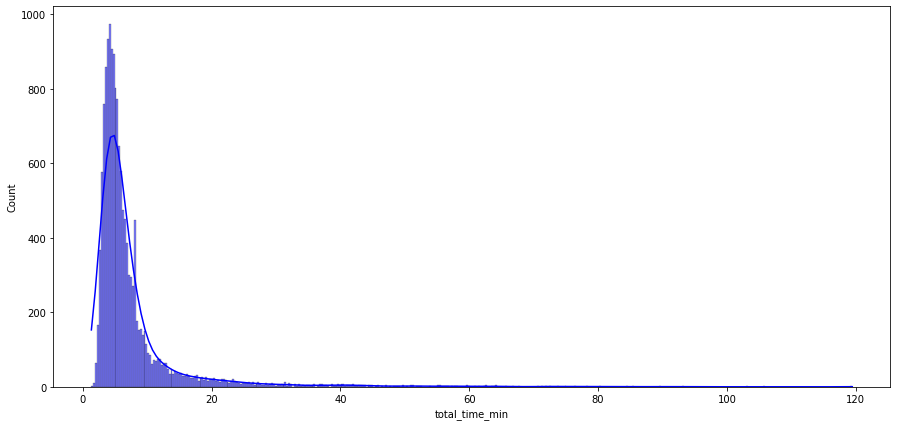

In [222]:
plt.figure(figsize = (15,7))
sns.histplot(x = train['total_time_min'], kde=True, color='blue')

<AxesSubplot:xlabel='introelapse', ylabel='Count'>

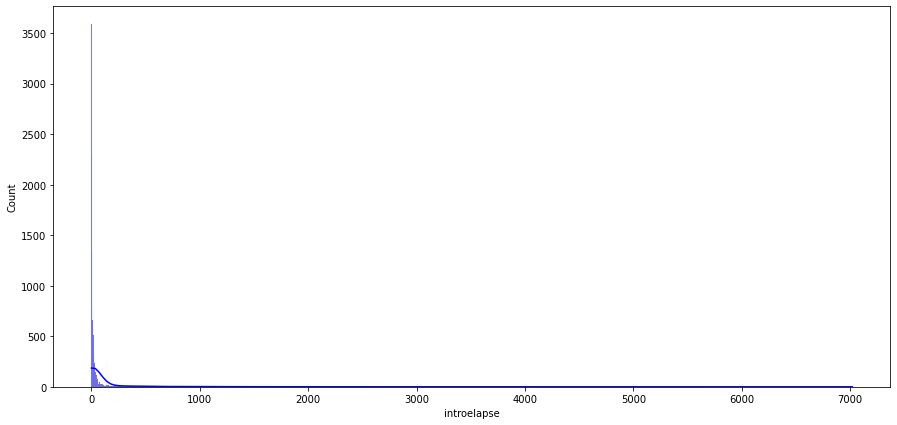

In [223]:
plt.figure(figsize = (15,7))
sns.histplot(x = train['introelapse'], kde=True, color='blue')

<AxesSubplot:xlabel='surveyelapse', ylabel='Count'>

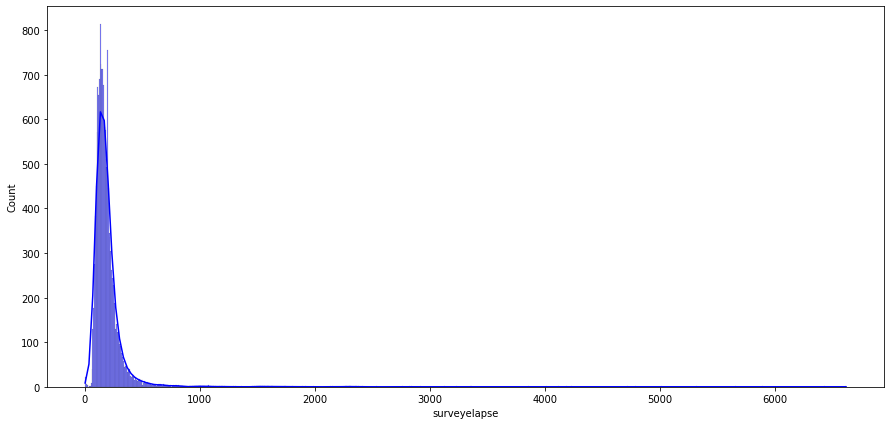

In [224]:
plt.figure(figsize = (15,7))
sns.histplot(x = train['surveyelapse'], kde=True, color='blue')

<AxesSubplot:xlabel='testelapse', ylabel='Count'>

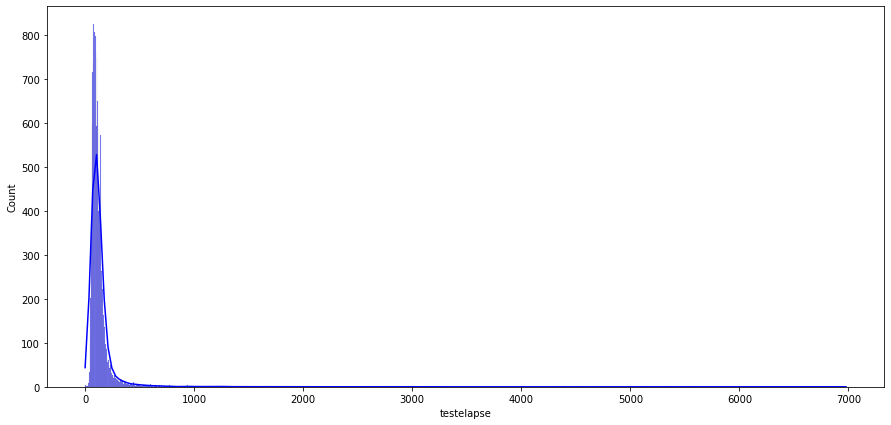

In [225]:
plt.figure(figsize = (15,7))
sns.histplot(x = train['testelapse'], kde=True, color='blue')

<AxesSubplot:xlabel='screenh', ylabel='Count'>

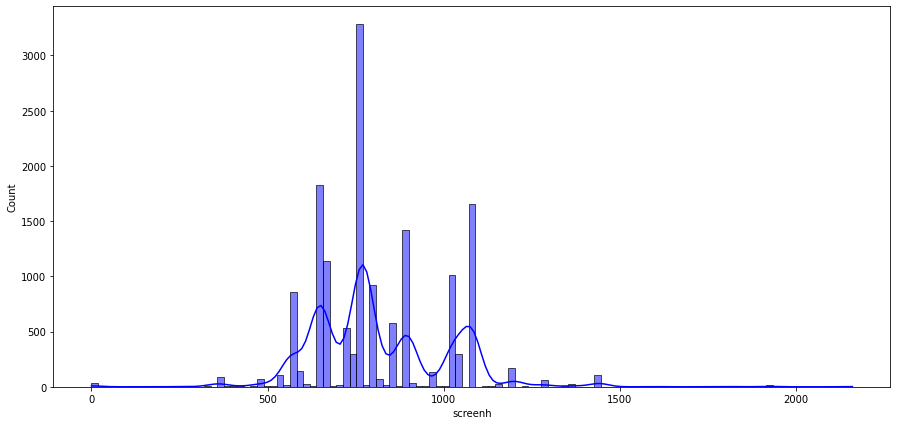

In [226]:
plt.figure(figsize = (15,7))
sns.histplot(x = train['screenh'], kde=True, color='blue')

<AxesSubplot:xlabel='screenw', ylabel='Count'>

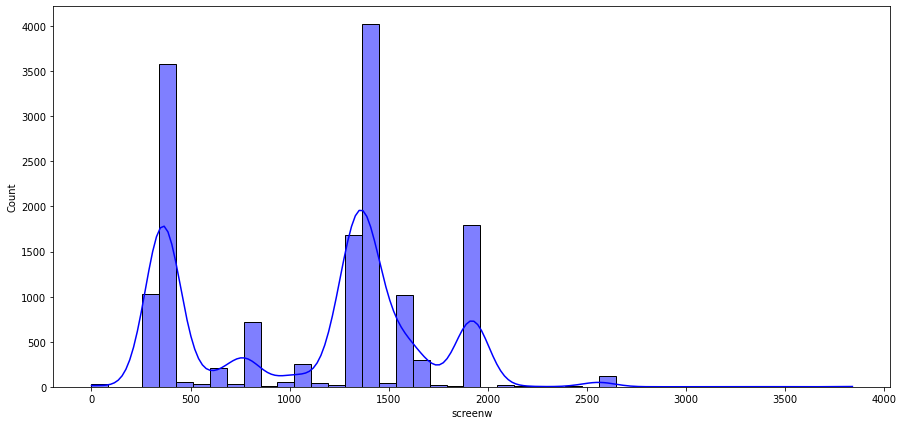

In [227]:
plt.figure(figsize = (15,7))
sns.histplot(x = train['screenw'], kde=True, color='blue')

<AxesSubplot:xlabel='que_score', ylabel='Count'>

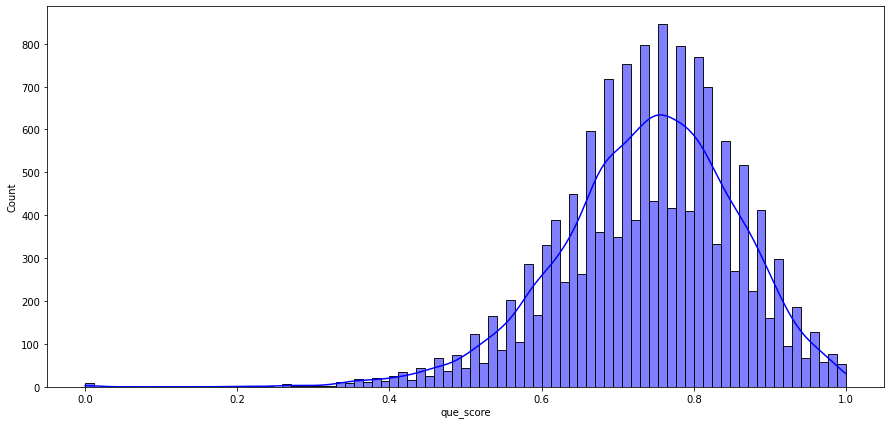

In [228]:
plt.figure(figsize = (15,7))
sns.histplot(x = train['que_score'], kde=True, color='blue')

<AxesSubplot:xlabel='tipi_score', ylabel='Count'>

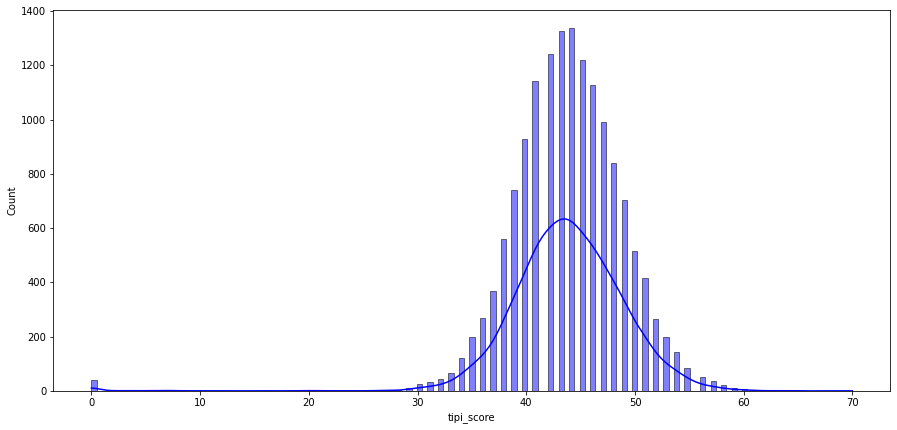

In [229]:
plt.figure(figsize = (15,7))
sns.histplot(x = train['tipi_score'], kde=True, color='blue')

<AxesSubplot:xlabel='age', ylabel='Count'>

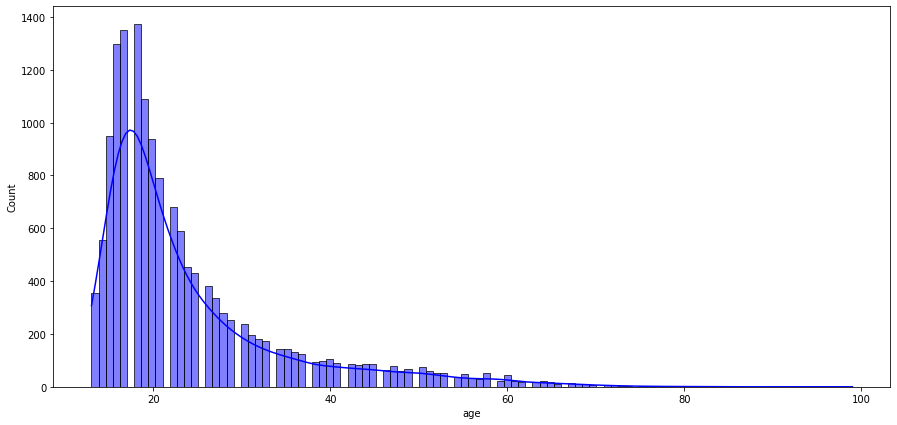

In [230]:
plt.figure(figsize = (15,7))
sns.histplot(x = train['age'], kde=True, color='blue')

<AxesSubplot:xlabel='nerdy', ylabel='familysize'>

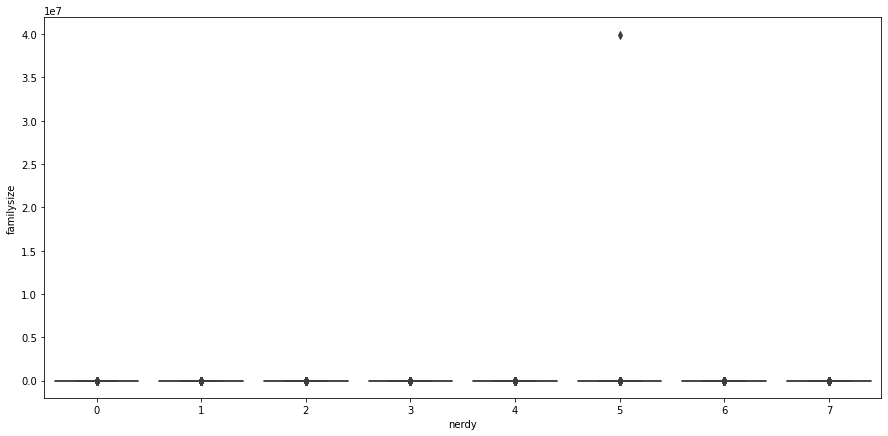

In [231]:
plt.figure(figsize = (15,7))
sns.boxplot(x = train['nerdy'], y= train['familysize'])

### FamilySize

In [232]:
train['familysize'].value_counts()

2           6453
3           3605
1           2401
4           1404
5            533
0            307
6            237
7             91
8             46
9             24
10            11
11             7
13             4
16             2
12             2
39             1
17             1
19             1
36             1
47             1
14             1
23             1
39947739       1
Name: familysize, dtype: int64

As we can see, there are some uncommon value in familysize. This might either be a typo or the person wouldnt want to answer that, so he filled some random values. The max number of birth by a mother after 1980 is 32 children. So any value above that is absurd.

In [233]:
train[train['familysize'] > 32]['age']

1084     15
6220     15
9532     45
12236    17
Name: age, dtype: int64

In [234]:
test['familysize'].value_counts()

2       4182
3       2415
1       1625
4       1004
5        362
0        204
6        153
7         71
8         35
9         12
10        10
11         5
12         4
13         4
15         1
22         1
23         1
2919       1
14         1
Name: familysize, dtype: int64

We will just replace all absurd values with the most frequennt value, i.e. 2

In [235]:
train[train['familysize'] > 32]['familysize']

1084           39
6220           36
9532           47
12236    39947739
Name: familysize, dtype: int64

In [236]:
train.loc[1084, 'familysize'] = 2
train.loc[6220, 'familysize'] = 2
train.loc[9532, 'familysize'] = 2
train.loc[12236, 'familysize'] = 2

In [237]:
test[test['familysize'] == 2919]

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,country_enc,no_major,continent,Africa,Asia,Aus,Europe,NA,NONE,SA
4916,462312,5,5,5,5,5,5,5,5,5,...,131,0,NA,0,0,0,0,1,0,0


In [238]:
test.loc[4916, 'familysize'] = 2

<AxesSubplot:xlabel='familysize', ylabel='count'>

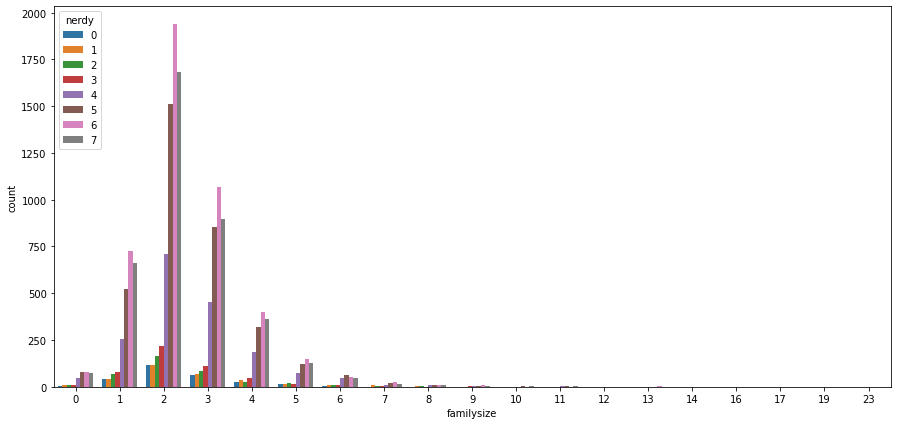

In [239]:
plt.figure(figsize = (15,7))
sns.countplot(hue = train['nerdy'], x= train['familysize'])

Now we will see how much are our numeric columns skewed, and will try to remove the skewness

Text(0.5, 1.0, 'boxcox - 0.053')

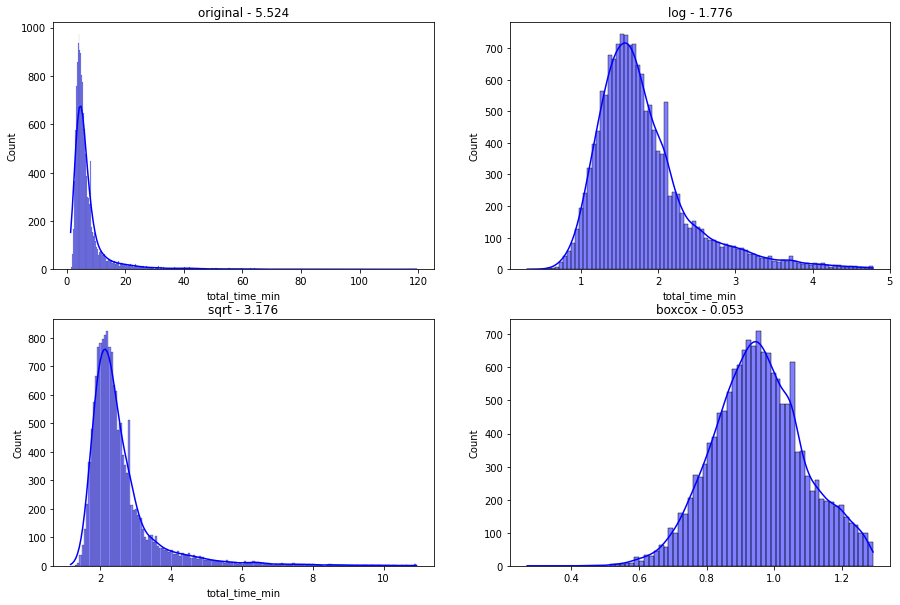

In [240]:
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
sns.histplot(x = (train['total_time_min']), kde=True, color='blue')
plt.title('original - %1.3f' % train['total_time_min'].skew())

plt.subplot(2,2,2)
sns.histplot(x = np.log(train['total_time_min']), kde=True, color='blue')
plt.title('log - %1.3f' % np.log1p(train['total_time_min']).skew())

plt.subplot(2,2,3)
sns.histplot(x = np.sqrt(train['total_time_min']), kde=True, color='blue')
plt.title('sqrt - %1.3f' % np.sqrt(train['total_time_min']).skew())

plt.subplot(2,2,4)
sns.histplot(x = stats.boxcox(train['total_time_min'])[0], kde=True, color='blue')
plt.title('boxcox - %1.3f' % pd.Series(stats.boxcox(train['total_time_min'])[0]).skew())

Text(0.5, 1.0, 'boxcox - 0.132')

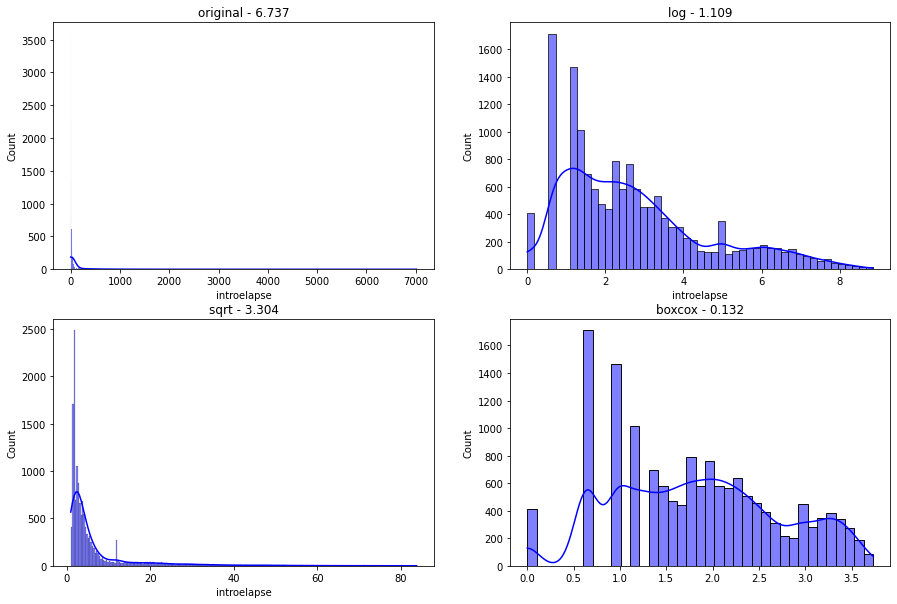

In [241]:
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
sns.histplot(x = (train['introelapse']), kde=True, color='blue')
plt.title('original - %1.3f' % train['introelapse'].skew())

plt.subplot(2,2,2)
sns.histplot(x = np.log(train['introelapse']), kde=True, color='blue')
plt.title('log - %1.3f' % np.log1p(train['introelapse']).skew())

plt.subplot(2,2,3)
sns.histplot(x = np.sqrt(train['introelapse']), kde=True, color='blue')
plt.title('sqrt - %1.3f' % np.sqrt(train['introelapse']).skew())

plt.subplot(2,2,4)
sns.histplot(x = stats.boxcox(train['introelapse'])[0], kde=True, color='blue')
plt.title('boxcox - %1.3f' % pd.Series(stats.boxcox(train['introelapse'])[0]).skew())

Text(0.5, 1.0, 'boxcox - -0.134')

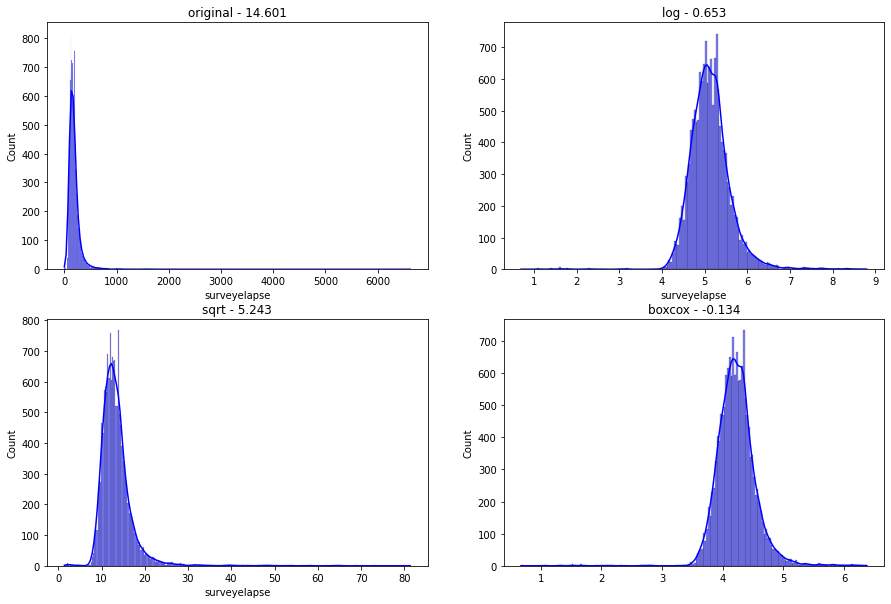

In [242]:
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
sns.histplot(x = (train['surveyelapse']), kde=True, color='blue')
plt.title('original - %1.3f' % train['surveyelapse'].skew())

plt.subplot(2,2,2)
sns.histplot(x = np.log(train['surveyelapse']), kde=True, color='blue')
plt.title('log - %1.3f' % np.log1p(train['surveyelapse']).skew())

plt.subplot(2,2,3)
sns.histplot(x = np.sqrt(train['surveyelapse']), kde=True, color='blue')
plt.title('sqrt - %1.3f' % np.sqrt(train['surveyelapse']).skew())

plt.subplot(2,2,4)
sns.histplot(x = stats.boxcox(train['surveyelapse'])[0], kde=True, color='blue')
plt.title('boxcox - %1.3f' % pd.Series(stats.boxcox(train['surveyelapse'])[0]).skew())

Text(0.5, 1.0, 'boxcox - -0.810')

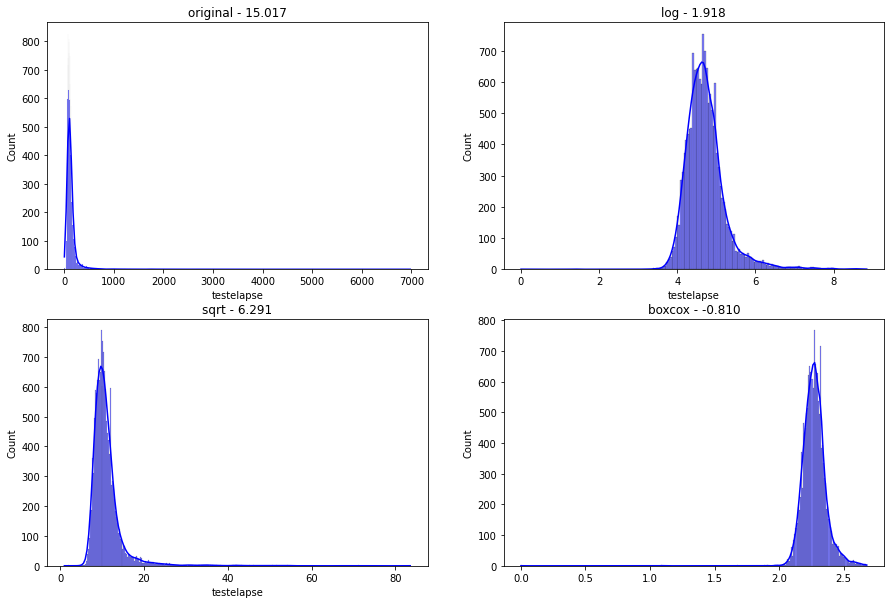

In [243]:
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
sns.histplot(x = (train['testelapse']), kde=True, color='blue')
plt.title('original - %1.3f' % train['testelapse'].skew())

plt.subplot(2,2,2)
sns.histplot(x = np.log(train['testelapse']), kde=True, color='blue')
plt.title('log - %1.3f' % np.log1p(train['testelapse']).skew())

plt.subplot(2,2,3)
sns.histplot(x = np.sqrt(train['testelapse']), kde=True, color='blue')
plt.title('sqrt - %1.3f' % np.sqrt(train['testelapse']).skew())

plt.subplot(2,2,4)
sns.histplot(x = stats.boxcox(train['testelapse'])[0], kde=True, color='blue')
plt.title('boxcox - %1.3f' % pd.Series(stats.boxcox(train['testelapse'])[0]).skew())

Applying log transform to all the features

In [244]:
train1 = train.copy()
test1 = test.copy()

In [245]:
cols = ['total_time_min', 'introelapse', 'surveyelapse', 'testelapse']

for col in cols:
    train1[col] = np.log1p(train1[col])
    test1[col] = np.log1p(test1[col])

In [246]:
test1

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,country_enc,no_major,continent,Africa,Asia,Aus,Europe,NA,NONE,SA
0,869598,3,5,4,3,5,5,5,4,4,...,19,0,SA,0,0,0,0,0,0,1
1,682098,4,5,5,4,5,3,5,4,4,...,33,0,Europe,0,0,0,1,0,0,0
2,278454,3,2,5,2,3,3,2,5,4,...,131,1,NA,0,0,0,0,1,0,0
3,119007,0,5,5,4,3,5,5,1,5,...,131,0,NA,0,0,0,0,1,0,0
4,49950,5,5,5,4,5,4,5,5,5,...,33,0,Europe,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10086,702877,5,5,5,5,5,5,1,5,1,...,131,0,NA,0,0,0,0,1,0,0
10087,183546,5,5,5,4,5,5,5,5,3,...,131,0,NA,0,0,0,0,1,0,0
10088,435694,5,4,5,5,2,4,3,5,3,...,117,1,Asia,0,1,0,0,0,0,0
10089,825049,4,2,4,2,5,3,5,3,5,...,95,1,Europe,0,0,0,1,0,0,0


In [247]:
train1.to_csv("train_pre1.csv",index=False )
test1.to_csv("test_pre1.csv",index=False )

 This way, we have preprocessed our data and also made some new columns that would help our model to find a better interaction between features and generalize well. By using the this preprocessed data and a simple untuned XGB model, I got a private score of 1.158, which is a very good score just by Feature Generation and EDA. I will also upload another notebook after this where I have used Stacking of various models to further improve the score to 1.101.